In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [80]:

df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') #nothing to change but NO PLATE INFO
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')


## df_GrowthCurve_allData

In [3]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_GrowthCurve_allData = df_GrowthCurve_allData.drop(columns=['row','column','endOD',
       'maxOD', 'maxOD.t', 'expAcc', 'lag', 'statAcc', 'stat', 'maxR',
       'maxR.t', 'minR', 'minR.t', 'Function', 'Structure_class_1',
       'Structure_class_2', 'Target.1']) 

df_GrowthCurve_allData = df_GrowthCurve_allData.rename(columns={'ProductName': 'Compound','Plate':'Plate_ID', 'MIC':'Control_Label'})

df_GrowthCurve_allData["Control_Label"] = df_GrowthCurve_allData["Control_Label"].apply(
       lambda x: 1 if x in ['Cipro', 'Fosfo'] else (-1 if x == 'DMSO' else 0)
)

df_GrowthCurve_allData

Well Plate_ID  Concentration                  Compound  t_0    t_2.08  \
0      A01      546            0.2                      DMSO  0.0  0.281996   
1      A02      546            0.2                      DMSO  0.0  0.288503   
2      A03      546            0.2  Polyoxyethylene stearate  0.0  0.286334   
3      A04      546            0.2       Lefamulin (acetate)  0.0  0.262473   
4      A05      546            0.2       Cefodizime (sodium)  0.0  0.275488   
...    ...      ...            ...                       ...  ...       ...   
18427  P20      S10            7.9                      DMSO  0.0  0.187970   
18428  P21      S10            7.9                      DMSO  0.0  0.185464   
18429  P22      S10            7.9                      DMSO  0.0  0.187970   
18430  P23      S10            7.9                      DMSO  0.0  0.197995   
18431  P24      S10            7.9                      DMSO  0.0  0.213033   

         t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  Control_Label  \
0      0.570499  0.763557  0.872017  0.965293  1.041215             -1   
1      0.613883  0.778742  0.889371  0.978308  1.062907             -1   
2      0.587852  0.765727  0.889371  0.982646  1.043384              0   
3      0.559653  0.737527  0.863341  0.950108  1.008677              0   
4      0.924078  0.676790  0.685466  0.668113  0.672451              0   
...         ...       ...       ...       ...       ...            ...   
18427  0.511278  0.736842  0.857143  0.924812  0.989975             -1   
18428  0.491228  0.736842  0.867168  0.937343  1.002506             -1   
18429  0.506266  0.741855  0.874687  0.942356  1.012531             -1   
18430  0.523810  0.761905  0.877193  0.932331  0.997494             -1   
18431  0.526316  0.736842  0.884712  0.947368  1.012531             -1   

                                                  Smiles  
0                                                    NaN  
1                                                    NaN  
2            O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]  
3      CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...  
4      O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...  
...                                                  ...  
18427                                                NaN  
18428                                                NaN  
18429                                                NaN  
18430                                                NaN  
18431                                                NaN  

[18432 rows x 13 columns]

## df_Enamine_t6_t12_wells/controls

In [81]:
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
df_Enamine_t6_t12_controls = df_Enamine_t6_t12_controls.drop(columns=['Unnamed: 0'], errors='ignore')


In [82]:
print(df_Enamine_t6_t12_controls['Replicate'].unique())
print(df_Enamine_t6_t12_wells['Replicate'].unique())

df_Enamine_t6_t12_controls

['OD_A' 'OD_C']
['OD_A' 'OD_C']


Well Replicate       Compound       t_0       t_6      t_12  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
12795  O24      OD_C           DMSO  0.000000  0.604127  1.090567   
12796  P01      OD_C           DMSO  0.000000  0.708738  1.205639   
12797  P02      OD_C           DMSO  0.000000  0.632895  1.085337   
12798  P23      OD_C  Ciprofloxacin  0.000000  0.005231  0.002615   
12799  P24      OD_C           DMSO  0.000000  0.627665  1.161180   

                                             Smiles          Plate_ID  \
0                                               NaN  1886318-Y12-A081   
1      1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                               NaN  1886318-Y12-A081   
3                                               NaN  1886318-Y12-A081   
4                                               NaN  1886318-Y12-A081   
...                                             ...               ...   
12795                                           NaN  1886318-Y12-A100   
12796                                           NaN  1886318-Y12-A100   
12797                                           NaN  1886318-Y12-A100   
12798  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A100   
12799                                           NaN  1886318-Y12-A100   

       Concentration  
0                 50  
1                 50  
2                 50  
3                 50  
4                 50  
...              ...  
12795             50  
12796             50  
12797             50  
12798             50  
12799             50  

[12800 rows x 9 columns]

In [83]:
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})
df_Enamine_t6_t12_controls=df_Enamine_t6_t12_controls.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})


df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_controls['Concentration'] = 50

df_Enamine_t6_t12_wells['Control_Label'] = 0


df_Enamine_t6_t12_controls['Control_Label'] = df_Enamine_t6_t12_controls["Compound"].apply(
    lambda x: 1 if x == 'Ciprofloxacin' else -1
)
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.drop(columns=['Activity'])


In [84]:
df_Enamine_t6_t12_controls

Well Replicate       Compound       t_0    t_6.24   t_12.48  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
12795  O24      OD_C           DMSO  0.000000  0.604127  1.090567   
12796  P01      OD_C           DMSO  0.000000  0.708738  1.205639   
12797  P02      OD_C           DMSO  0.000000  0.632895  1.085337   
12798  P23      OD_C  Ciprofloxacin  0.000000  0.005231  0.002615   
12799  P24      OD_C           DMSO  0.000000  0.627665  1.161180   

                                             Smiles          Plate_ID  \
0                                               NaN  1886318-Y12-A081   
1      1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                               NaN  1886318-Y12-A081   
3                                               NaN  1886318-Y12-A081   
4                                               NaN  1886318-Y12-A081   
...                                             ...               ...   
12795                                           NaN  1886318-Y12-A100   
12796                                           NaN  1886318-Y12-A100   
12797                                           NaN  1886318-Y12-A100   
12798  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A100   
12799                                           NaN  1886318-Y12-A100   

       Concentration  Control_Label  
0                 50             -1  
1                 50              1  
2                 50             -1  
3                 50             -1  
4                 50             -1  
...              ...            ...  
12795             50             -1  
12796             50             -1  
12797             50             -1  
12798             50              1  
12799             50             -1  

[12800 rows x 10 columns]

## df_control_growth_curves

In [7]:
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') 

In [8]:
df_control_growth_curves["Well"] = df_control_growth_curves["Well"].str[0] + df_control_growth_curves["Well"].str[1:].str.zfill(2)

df_control_growth_curves['Control_Label'] = df_control_growth_curves["Compound"].apply(
    lambda x: -1 if x == 'DMSO' else 1
)
df_control_growth_curves["Plate_ID"] = 'unknown'

In [9]:
df_control_growth_curves

Well  Concentration       Compound  Replicate       t_0    t_2.08  \
0    C03          50.00     Rifampicin          4  0.003157  0.001579   
1    C04           0.20     Fosfomycin          1  0.000000  0.137337   
2    C06           7.90  Ciprofloxacin          4  0.000000  0.012629   
3    C08           3.13  Ciprofloxacin          5  0.000000  0.029993   
4    C09          50.00   Trimethoprim          5  0.000000  0.033150   
..   ...            ...            ...        ...       ...       ...   
195  N16           7.90  Ciprofloxacin          2  0.000000  0.009472   
196  N17           7.90           DMSO          5  0.000000  0.127866   
197  N20           3.13     Rifampicin          6  0.000000  0.066301   
198  N21          50.00           DMSO          2  0.000000  0.126287   
199  N22          12.50     Rifampicin          6  0.000000  0.007893   

       t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  \
0    0.001579  0.001579  0.001579  0.001579  0.003157   
1    0.503571  0.688266  0.926633  1.109750  1.212358   
2    0.014207  0.012629  0.011050  0.011050  0.009472   
3    0.042622  0.039465  0.036308  0.033150  0.031572   
4    0.137337  0.157859  0.172066  0.154702  0.170488   
..        ...       ...       ...       ...       ...   
195  0.011050  0.011050  0.009472  0.009472  0.007893   
196  0.451477  0.607758  0.771931  0.838232  1.101857   
197  0.102608  0.101030  0.086823  0.083665  0.061565   
198  0.416748  0.514621  0.606179  0.674058  0.735624   
199  0.009472  0.009472  0.009472  0.009472  0.007893   

                                                Smiles  Control_Label Plate_ID  
0    CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  
1                            C[C@H]1[C@H](O1)P(=O)(O)O              1  unknown  
2        C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
3        C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
4                      Nc1nc(N)ncc1Cc(cc2OC)cc(OC)c2OC              1  unknown  
..                                                 ...            ...      ...  
195      C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
196                                                NaN             -1  unknown  
197  CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  
198                                                NaN             -1  unknown  
199  CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  

[200 rows x 14 columns]

## df_Enamine_DR_growthCurves

In [10]:
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')

In [11]:
df_Enamine_DR_growthCurves

Well    Plate     Compound  Concentration Replicate  t_0    t_2.08  \
0     A03  111-DR1    Z27542156         50.000         D  0.0  0.130220   
1     A04  111-DR1    Z27542156         12.500         D  0.0  0.171074   
2     A05  111-DR1    Z27542156          3.130         D  0.0  0.181287   
3     A06  111-DR1    Z27542156          0.781         D  0.0  0.194054   
4     A07  111-DR1    Z27542156          0.200         D  0.0  0.194054   
...   ...      ...          ...            ...       ...  ...       ...   
2635  P03  111-DR9  Z6204188633         50.000         E  0.0  0.225165   
2636  P04  111-DR9  Z6204188633         12.500         E  0.0  0.291691   
2637  P05  111-DR9  Z6204188633          3.130         E  0.0  0.281456   
2638  P06  111-DR9  Z6204188633          0.781         E  0.0  0.278897   
2639  P07  111-DR9  Z6204188633          0.200         E  0.0  0.286573   

        t_4.16    t_6.24    t_8.32    t_10.4   t_12.48       MIC  \
0     0.434068  0.625569  0.732809  0.840049  0.947289  Inactive   
1     0.518328  0.651102  0.778769  0.901329  1.018783  Inactive   
2     0.543862  0.668975  0.801749  0.926863  1.039210  Inactive   
3     0.556628  0.679189  0.804302  0.931969  1.039210  Inactive   
4     0.571948  0.686849  0.814516  0.939629  1.049423  Inactive   
...        ...       ...       ...       ...       ...       ...   
2635  0.501503  0.624320  0.716433  0.790635  0.859720  Inactive   
2636  0.614086  0.734344  0.857161  0.959509  1.056739  Inactive   
2637  0.624320  0.762490  0.890424  1.000448  1.107913  Inactive   
2638  0.647349  0.752255  0.895541  1.013241  1.123265  Inactive   
2639  0.593616  0.739461  0.887865  1.013241  1.113030  Inactive   

                                               Smiles  
0     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
1     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
2     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
3     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
4     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
...                                               ...  
2635                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2636                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2637                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2638                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2639                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  

[2640 rows x 14 columns]

In [12]:
df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.rename(columns={"Plate":"Plate_ID"})
df_Enamine_DR_growthCurves['Control_Label'] = 0

df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.drop(columns=['MIC'])

In [13]:
print(df_Enamine_DR_growthCurves['Replicate'].unique())
df_Enamine_DR_growthCurves

['D' 'E']


Well Plate_ID     Compound  Concentration Replicate  t_0    t_2.08  \
0     A03  111-DR1    Z27542156         50.000         D  0.0  0.130220   
1     A04  111-DR1    Z27542156         12.500         D  0.0  0.171074   
2     A05  111-DR1    Z27542156          3.130         D  0.0  0.181287   
3     A06  111-DR1    Z27542156          0.781         D  0.0  0.194054   
4     A07  111-DR1    Z27542156          0.200         D  0.0  0.194054   
...   ...      ...          ...            ...       ...  ...       ...   
2635  P03  111-DR9  Z6204188633         50.000         E  0.0  0.225165   
2636  P04  111-DR9  Z6204188633         12.500         E  0.0  0.291691   
2637  P05  111-DR9  Z6204188633          3.130         E  0.0  0.281456   
2638  P06  111-DR9  Z6204188633          0.781         E  0.0  0.278897   
2639  P07  111-DR9  Z6204188633          0.200         E  0.0  0.286573   

        t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  \
0     0.434068  0.625569  0.732809  0.840049  0.947289   
1     0.518328  0.651102  0.778769  0.901329  1.018783   
2     0.543862  0.668975  0.801749  0.926863  1.039210   
3     0.556628  0.679189  0.804302  0.931969  1.039210   
4     0.571948  0.686849  0.814516  0.939629  1.049423   
...        ...       ...       ...       ...       ...   
2635  0.501503  0.624320  0.716433  0.790635  0.859720   
2636  0.614086  0.734344  0.857161  0.959509  1.056739   
2637  0.624320  0.762490  0.890424  1.000448  1.107913   
2638  0.647349  0.752255  0.895541  1.013241  1.123265   
2639  0.593616  0.739461  0.887865  1.013241  1.113030   

                                               Smiles  Control_Label  
0     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
1     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
2     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
3     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
4     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
...                                               ...            ...  
2635                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2636                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2637                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2638                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2639                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  

[2640 rows x 14 columns]

In [14]:
df_Enamine_DR_compounds = df_Enamine_DR_growthCurves['Compound'].unique()

# Functions

In [165]:

def plot_hist_od_distributions(df, concentration, max_density):
    #timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    timepoints = ['t_0', 't_6.24','t_12.48']
    labels = [-1, 0, 1]
    colors = { -1: '#1f77b4', 0: '#ff7f0e', 1: '#2ca02c' }
    label_names = {-1: "Negative Control", 0: "Test Compound", 1: "Positive Control"}

    # Filter the data based on the given concentration
    df_sub = df[df['Concentration'] == concentration]
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, time in enumerate(timepoints):
        ax = axes[i]
        # Plot histograms for each control label group
        for label in labels:
            subset = df_sub[df_sub['Control_Label'] == label]
            ax.hist(
                subset[time],
                bins=30,
                alpha=0.3,
                density=True,
                label=label_names[label],  # Use descriptive label names
                color=colors[label],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )
        # Calculate median and MAD for Test Compounds at the current timepoint (Control_Label == 0)
        #test_subset = df_sub[df_sub['Control_Label'] == 0]
        test_subset = df_sub[df_sub['Control_Label'] != 1]

        median_val = test_subset[time].median()
        mad_val = np.median(np.abs(test_subset[time].dropna() - median_val))
        print(f'{concentration} median_val - 2 * mad_val: {median_val - 2 * mad_val}')
        
        # Plot vertical lines for the median and median minus 1, 2, and 3 MAD.
        # Label the lines only on the first subplot to avoid duplicate entries in the legend.
        if i == 0:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5, label='Test Compound Median')
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5, label='Median - 1*MAD')
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5, label='Median - 2*MAD')
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5, label='Median - 3*MAD')
        else:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5)
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5)
        
        ax.set_title(f'{time}')
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # Set the y-axis limit to ensure consistency across subplots
        ax.set_ylim(0, max_density)

    # Remove any extra subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    # Get handles and update the legend based on the descriptive labels and added vertical lines
    handles, legend_labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, legend_labels, loc='upper right', title='Control_Label')
    
    fig.suptitle(f'OD Distributions at Concentration {concentration} (Histograms) for df_GrowthCurve_Alldata', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/df_Enamine_t6_t12/corrected_OD_dist/corrected_OD__dist_{concentration}.png')
    #plt.show()

In [176]:
def label_inactives_actives(df_wide,dataset,mad_multiplier: int = 3):

    timepoints = sorted([c for c in df_wide.columns if c.startswith('t_')],
                    key=lambda s: float(s.split('_')[1]))


    if dataset=='df_GrowthCurve_allData':
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound','Control_Label', 'Smiles']

    else:
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound', 'Replicate','Control_Label', 'Smiles']

    

    df_long = df_wide.melt(
        id_vars=id_vars,
        value_vars=timepoints,
        var_name='Timepoint',
        value_name='OD'
    )

    # --------------------------------------------------------------------------
    # 2. median & MAD on DMSO (negative controls only)
    # --------------------------------------------------------------------------
    dmso = df_long[df_long['Control_Label'] == -1]

    group_stats = (
        dmso
        .groupby(['Plate_ID', 'Concentration', 'Timepoint'])['OD']
        .agg(
            dmso_median='median',
            dmso_mad=lambda x: np.median(np.abs(x - np.median(x)))
        )
        .reset_index()
    )
    group_stats['threshold'] = (
        group_stats['dmso_median'] - mad_multiplier * group_stats['dmso_mad']
    )

    # --------------------------------------------------------------------------
    # 3. merge thresholds back and flag actives
    # --------------------------------------------------------------------------
    comb_df = df_long.merge(
        group_stats[['Plate_ID', 'Concentration', 'Timepoint', 'threshold']],
        on=['Plate_ID', 'Concentration', 'Timepoint'],
        how='left'
    )

    #comb_df['is_Active'] = (comb_df['OD'] < comb_df['threshold']).astype(int)

    comb_df['is_below_thresh'] = comb_df['OD'] < comb_df['threshold']

    if 'Replicate' in comb_df.columns:
        group_keys = ['Plate_ID', 'Concentration', 'Timepoint', 'Compound']
        comb_df['is_Active'] = (
            comb_df
            .groupby(group_keys)['is_below_thresh']
            .transform('all')          # True only if every replicate is True
            .astype(int)
        )
    else:
        comb_df['is_Active'] = comb_df['is_below_thresh'].astype(int)

    return comb_df, group_stats

In [167]:
def plot_sample_counts_per_well(
    df,
    well_col: str = 'Well',
    rows: list[str] = None,
    cols: list[int] = None,
    figsize: tuple[int,int] = (12, 6),
    title: str = 'Sample Counts per Well',
    cmap: str = 'viridis'
):

    # defaults for full 16×24 plate
    if rows is None:
        rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    if cols is None:
        cols = list(range(1, 25))

    # build the count matrix
    counts = df[well_col].value_counts()
    mat = np.zeros((len(rows), len(cols)), dtype=int)
    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            well = f"{r}{c:02d}"
            mat[i, j] = counts.get(well, 0)

    # plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(mat, origin='upper', aspect='equal', cmap=cmap)
    max_val = mat.max()

    # annotate with counts
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            color = 'white' if mat[i, j] > max_val/2 else 'black'
            ax.text(j, i, mat[i, j], ha='center', va='center', color=color)

    # axis labels
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols)
    ax.set_yticks(np.arange(len(rows)))
    ax.set_yticklabels(rows)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title(title)

    # colorbar
    fig.colorbar(cax, ax=ax, label='Count')
    plt.tight_layout()
    plt.show

In [168]:
def augment_specific_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    - For column '02', duplicate rows I–P into A–H (A02 ← P02, B02 ← O02, … H02 ← I02).
    - For column '23', duplicate rows A–H into I–P (P23 ← A23, O23 ← B23, … I23 ← H23).
    """
    rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    
    # A<->P, B<->O, …, H<->I
    sym_map = { r: rows[-1-i] for i, r in enumerate(rows) }
    print(sym_map)
    to_append = []

    # 1) Column '02': copy I–P rows into A–H
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{sym_map[r]}02" # P02, O02, …, I02
        tgt_well = f"{r}02"          # A02, B02, …, H02
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 2) Column '23': copy A–H rows into I–P
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{r}23"          # A23, B23, …, H23
        tgt_well = f"{sym_map[r]}23" # P23, O23, …, I23
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 3) Concatenate back onto the original
    if to_append:
        df = pd.concat([df, *to_append], ignore_index=True)
    return df

In [169]:
def plot_aggregated_heatmaps_long(
    correct_uncorrect,
    dataset,
    df_long,
    timepoint,
    vmin=None,
    vmax=None,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4)
):
    """
    Aggregates median OD values at a given timepoint across all plates,
    then plots one heatmap per concentration using long-format DataFrame.
    Removed DMSO overlay.
    """
    concs = sorted(df_long['Concentration'].dropna().unique())
    n = len(concs)
    ncols = min(max_cols, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(figsize_per_subplot[0] * ncols, figsize_per_subplot[1] * nrows),
        constrained_layout=True
    )
    axes = np.atleast_1d(axes).flatten()

    for ax, conc in zip(axes, concs):
        sub = df_long[
            (df_long['Concentration'] == conc) &
            (df_long['Timepoint'] == timepoint)
        ]

        # compute median OD per well
        med = sub.groupby('Well')['OD'].median().reset_index(name='MedianOD')
        med['Row'] = med['Well'].str[0]
        med['Col'] = med['Well'].str[1:].astype(int)
        heatmap_data = med.pivot(index='Row', columns='Col', values='MedianOD')

        # draw heatmap
        im = sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            square=True
        )

        # annotate number of plates
        num_plates = sub['Plate_ID'].nunique()
        ax.set_title(f'{conc} µM ({num_plates} plates)')
        ax.set_xlabel('Col')
        ax.set_ylabel('Row')

    # turn off unused subplots
    for ax in axes[len(concs):]:
        ax.axis('off')

    # shared colorbar
    mappable = axes[0].collections[0]
    fig.colorbar(
        mappable,
        ax=axes.tolist(),
        orientation='vertical',
        fraction=0.02,
        pad=0.04,
        label=f'OD @ {timepoint}'
    )

    plt.suptitle(f'{dataset} {correct_uncorrect}: Median @ {timepoint}', y=1.02)
    
    plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/{correct_uncorrect}_heatmap_{timepoint}.png')

In [170]:
def correct_well_batch_effect_time(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint'], how='left')
    df = df.merge(global_medians, on=['Timepoint'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

def correct_well_batch_effect_time_conc(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint','Concentration'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint', 'Concentration'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint','Concentration'], how='left')
    df = df.merge(global_medians, on=['Timepoint','Concentration'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

In [171]:
def correct_plate_batch_effect(
    df: pd.DataFrame,
) -> pd.DataFrame:

    # 1) Compute median OD of negative controls on each plate
    neg_ctrl = df[df['Control_Label'] == -1]
    plate_ctrl_meds = (
        neg_ctrl
        .groupby('Plate_ID')['OD']
        .median()
        .reset_index(name='plate_ctrl_med')
    )

    # 2) Merge back onto full DataFrame
    df_norm = df.merge(plate_ctrl_meds, on='Plate_ID', how='left')

    # 3) Normalize
    df_norm['OD'] = df_norm['OD'] / df_norm['plate_ctrl_med']

    # 4) Clean up
    df_norm = df_norm.drop(columns=['plate_ctrl_med'])

    return df_norm

In [238]:
def plot_hist_od_distributions_long(
    title,
    correct_uncorrect,
    dataset,
    df_long,
    bins,                       
    concentration,
    max_density,
    max_x,
    time_col='Timepoint',
    od_col='OD',
    conc_col='Concentration',
    control_label_col='Control_Label'
):
    """
    Plot overlaid OD histograms by Control_Label at each timepoint,
    allowing a different `bins` specification for each label.
    """
    # ── helper to fetch per-label bins ───────────────────────────────────────────
    def _bins_for(label):
        # if user gave one global spec => just echo it back
        if not isinstance(bins, dict):
            return bins
        # else fall back to a reasonable default (e.g. 30) if key missing
        return bins.get(label, 30)

    # timepoints in chronological order
    timepoints = sorted(
        df_long[time_col].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )
    print(f"Timepoints: {timepoints}")

    labels       = [-1, 0, 1]
    colors       = {-1:'#1f77b4', 0:'#ff7f0e', 1:'#2ca02c'}
    label_names  = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}

    df_sub = df_long[df_long[conc_col] == concentration]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax     = axes[i]
        sub_tp = df_sub[df_sub[time_col] == tp]

        for lab in labels:
            grp = sub_tp[sub_tp[control_label_col] == lab]
            ax.hist(
                grp[od_col],
                bins=_bins_for(lab),        # ← per-label bins
                alpha=0.30,
                density=True,
                label=label_names[lab],
                color=colors[lab],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )

        # reference lines computed on negatives only
        test_grp = sub_tp[sub_tp[control_label_col] == -1]
        med = test_grp[od_col].median()
        mad = np.median(np.abs(test_grp[od_col].dropna() - med))

        if i == 0:
            ax.axvline(med,            color='black', linestyle='--', linewidth=1.5, label='Median')
            ax.axvline(med - mad,      color='red',   linestyle=':',  linewidth=1.5, label='-1 MAD')
            ax.axvline(med - 2*mad,    color='orange',linestyle=':',  linewidth=1.5, label='-2 MAD')
            ax.axvline(med - 3*mad,    color='green', linestyle=':',  linewidth=1.5, label='-3 MAD')
        else:
            for k, col in enumerate(['black','red','orange','green']):
                ax.axvline(med - k*mad,
                           color=col,
                           linestyle='--' if k==0 else ':',
                           linewidth=1.5)

        ax.set_title(tp)
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.set_ylim(0, max_density)
        ax.set_xlim(0, max_x)
        ax.grid(True, linestyle='--', alpha=0.5)

    # strip unused panels
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc='upper right', title='Control_Label')
    fig.suptitle(f'OD Distributions at {concentration} µM with {title}', fontsize=16)
    plt.tight_layout(rect=[0,0,0.95,0.95])
    plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/Well_OD_distribution_conc_{concentration}.png')

# GrowthCurve processing

In [39]:
df = df_GrowthCurve_allData.copy()
df.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 't_0', 't_2.08',
       't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Control_Label',
       'Smiles'],
      dtype='object')

Replciates D and E come from dataset df_Enamine_DR_growthCurves

Replicates 1 to 6 come from df_control_growth_curves

Replciates OD_A and OD_C come from t6_t12_controls and t6_t12_wells

## Add active/inactive label based on -3*MAD threshold on DMSO per plate

In [42]:
df,_=label_inactives_actives(df, mad_multiplier=3)

['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']


In [44]:
df['Timepoint'].value_counts()

t_0        18432
t_2.08     18432
t_4.16     18432
t_6.24     18432
t_8.32     18432
t_10.4     18432
t_12.48    18432
Name: Timepoint, dtype: int64

In [46]:
df['is_Active'].sum()

16210

## Row and Column Batch effect

In [47]:
mask_actives_pos_controls = (df['is_Active'] == 1) | (df['Control_Label'] == 1)

# Keep only the rows you’re not removing
df_no_active_pos = df.loc[~mask_actives_pos_controls].reset_index(drop=True)


In [48]:
df_no_active_pos['is_Active'].sum()

0

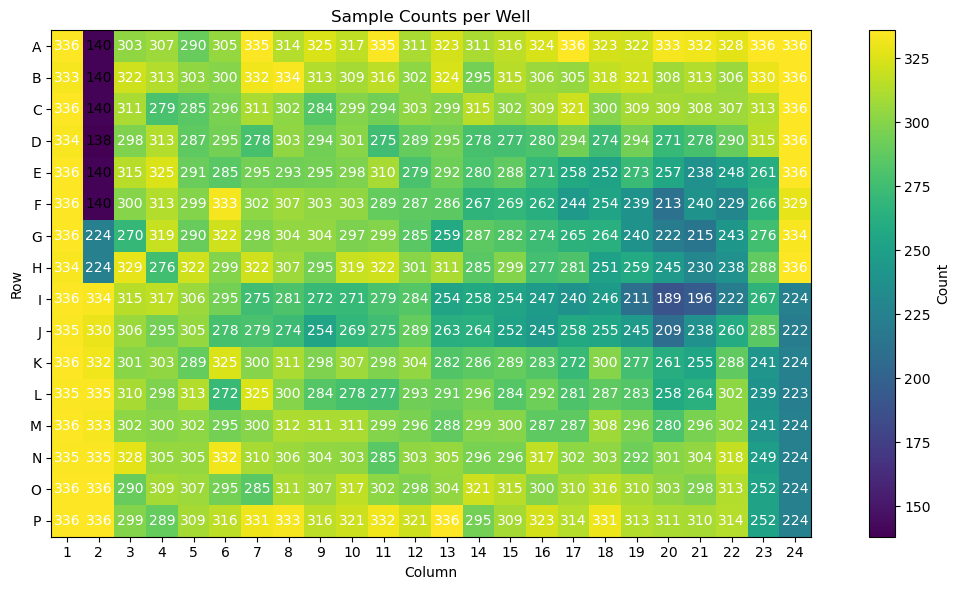

In [49]:
plot_sample_counts_per_well(df_no_active_pos)

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


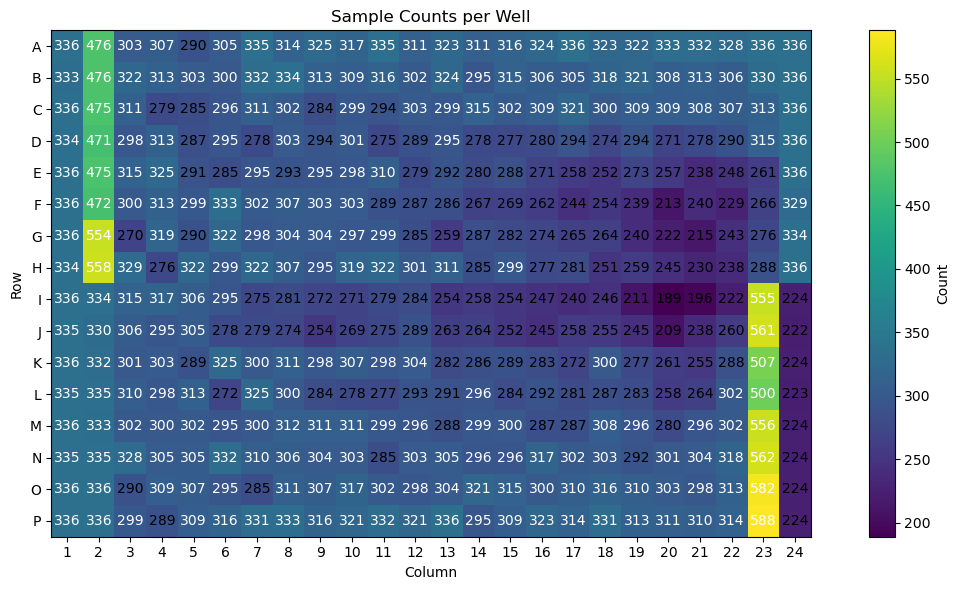

In [50]:

df_filled_no_active_pos = augment_specific_columns(df_no_active_pos)

plot_sample_counts_per_well(df_filled_no_active_pos)

In [ ]:
for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='uncorrected',
        dataset='df_GrowthCurve',
        df_long=df_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,

    )

In [67]:

df_well_corrected_2,global_medians,well_medians = correct_well_batch_effect_time_conc(df)

df_well_corrected_1,global_medians,well_medians = correct_well_batch_effect_time(df)


In [ ]:
mask_actives_pos_controls = (df_well_corrected_1['is_Active'] == 1) | (df_well_corrected_1['Control_Label'] == 1)

df_well_corrected_1_no_active_pos = df_well_corrected_1.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(

        correct_uncorrect='correction_1',
        dataset='df_GrowthCurve',
        df_long=df_well_corrected_1_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
    )

In [ ]:
mask_actives_pos_controls = (df_well_corrected_2['is_Active'] == 1) | (df_well_corrected_2['Control_Label'] == 1)

df_well_corrected_2_no_active_pos = df_well_corrected_2.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(

        correct_uncorrect='correction_2',
        dataset='df_GrowthCurve',
        df_long=df_well_corrected_2_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
    )

## Median of Plate Negative control batch effect

In [57]:
df_well_corrected_1['Control_Label'].value_counts()

 0    83272
-1    42952
 1     2800
Name: Control_Label, dtype: int64

In [56]:
df_well_corrected_2['Control_Label'].value_counts()

 0    83272
-1    42952
 1     2800
Name: Control_Label, dtype: int64

In [58]:

df_plate_well_corrected_1 = correct_plate_batch_effect(df_well_corrected_1)

df_plate_well_corrected_2 = correct_plate_batch_effect(df_well_corrected_2)

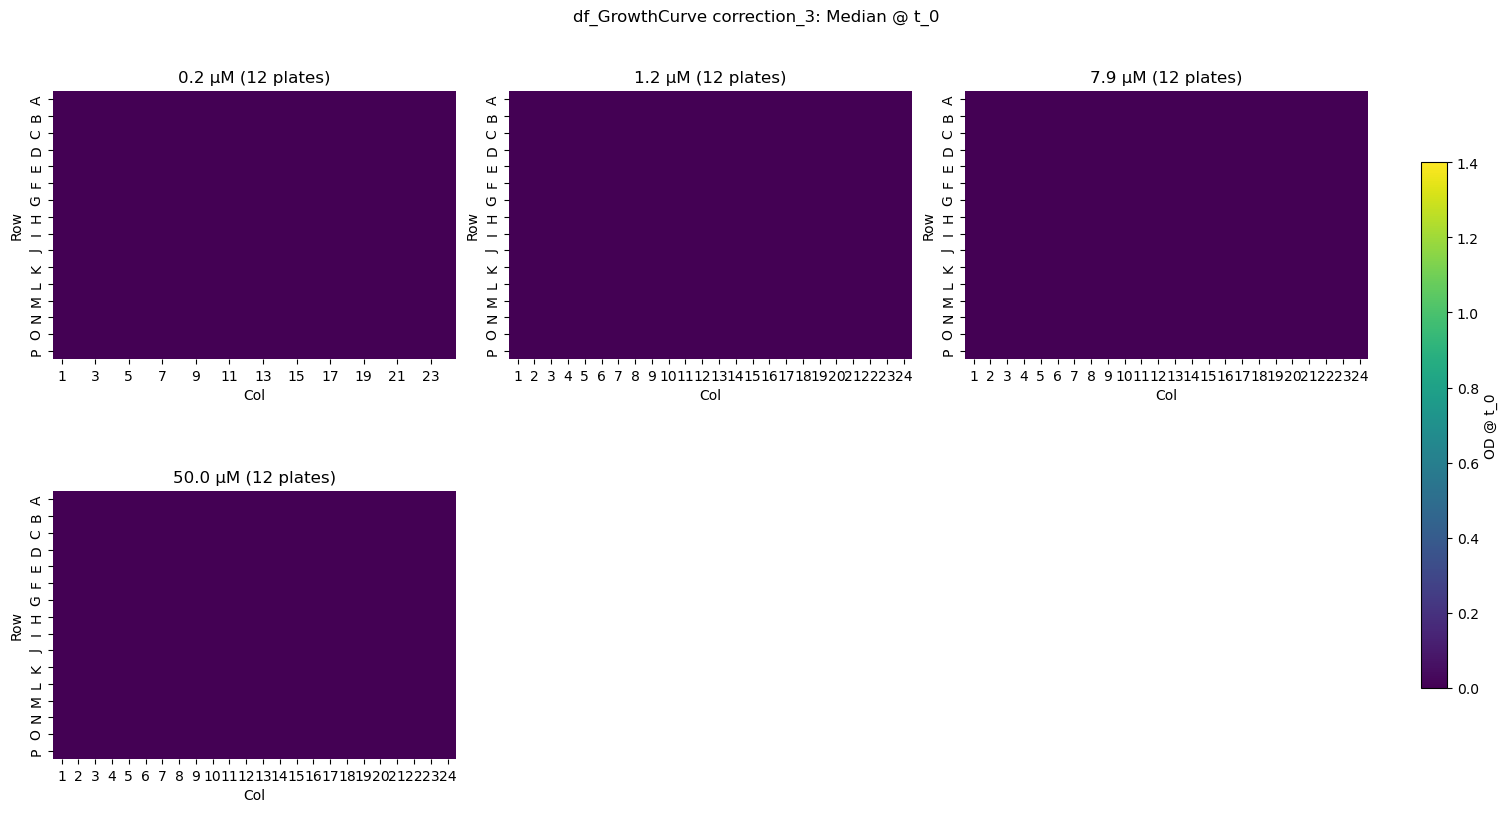

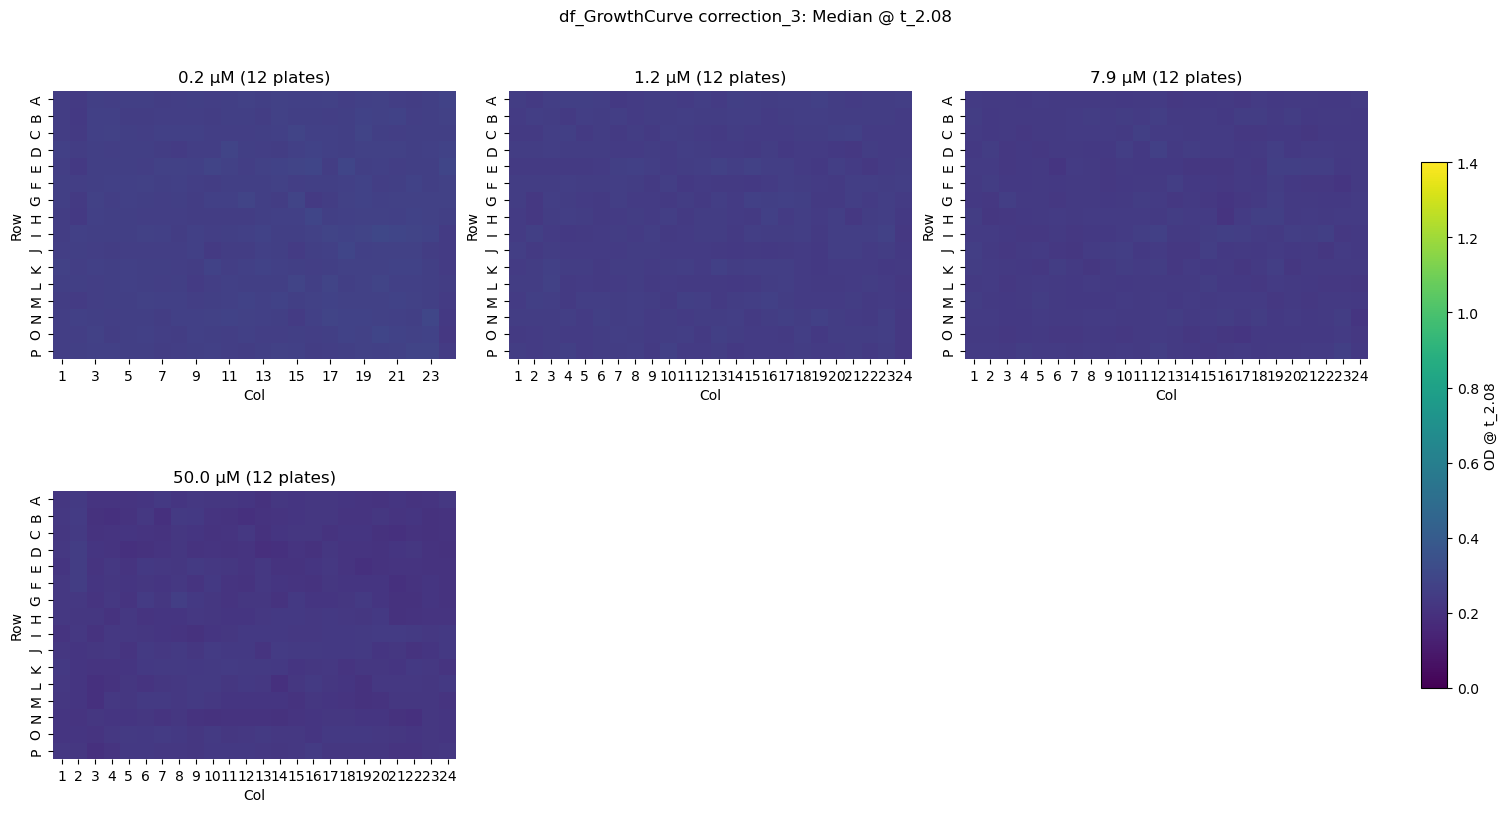

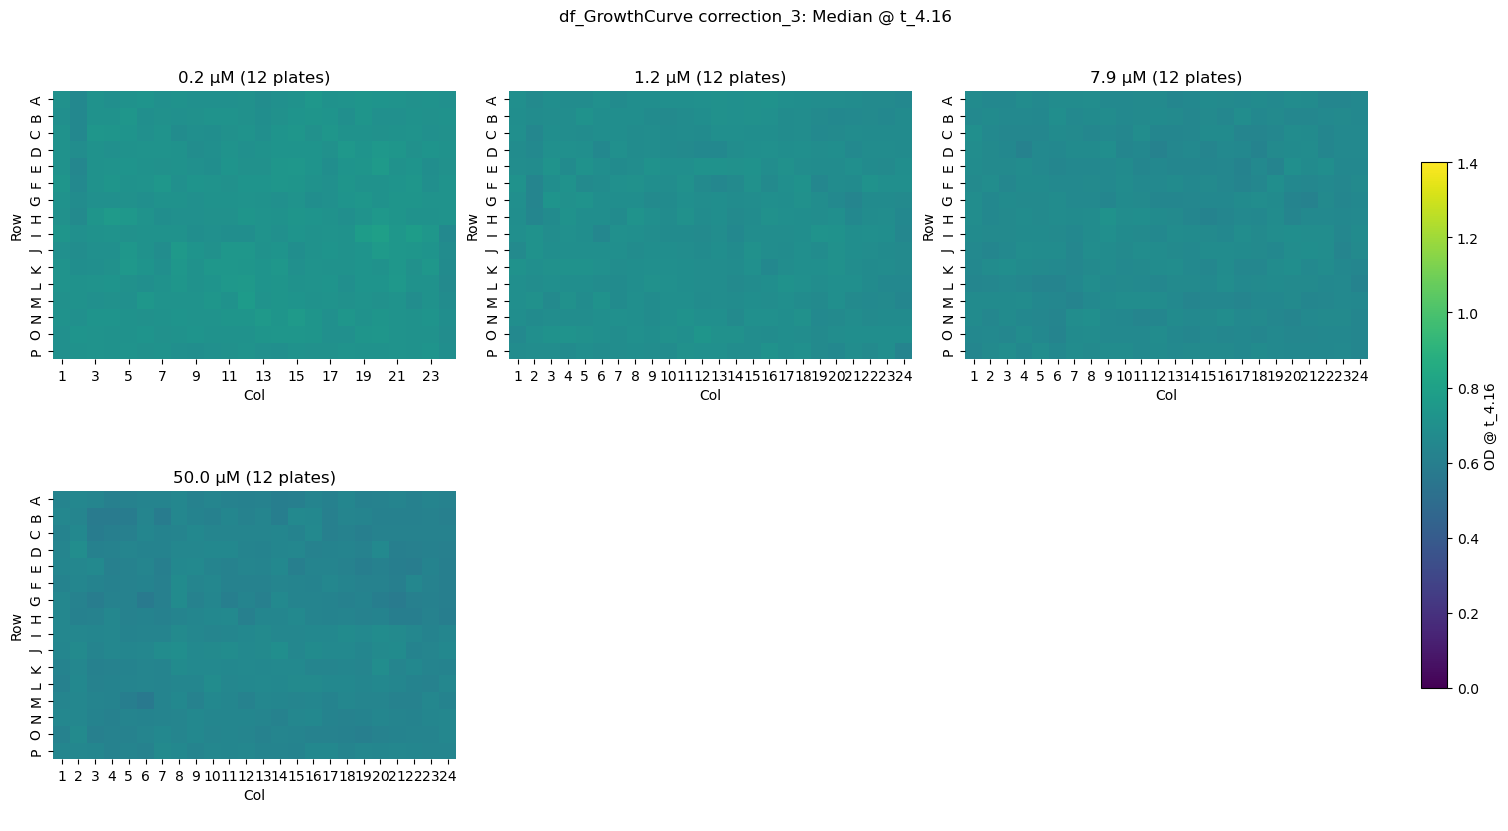

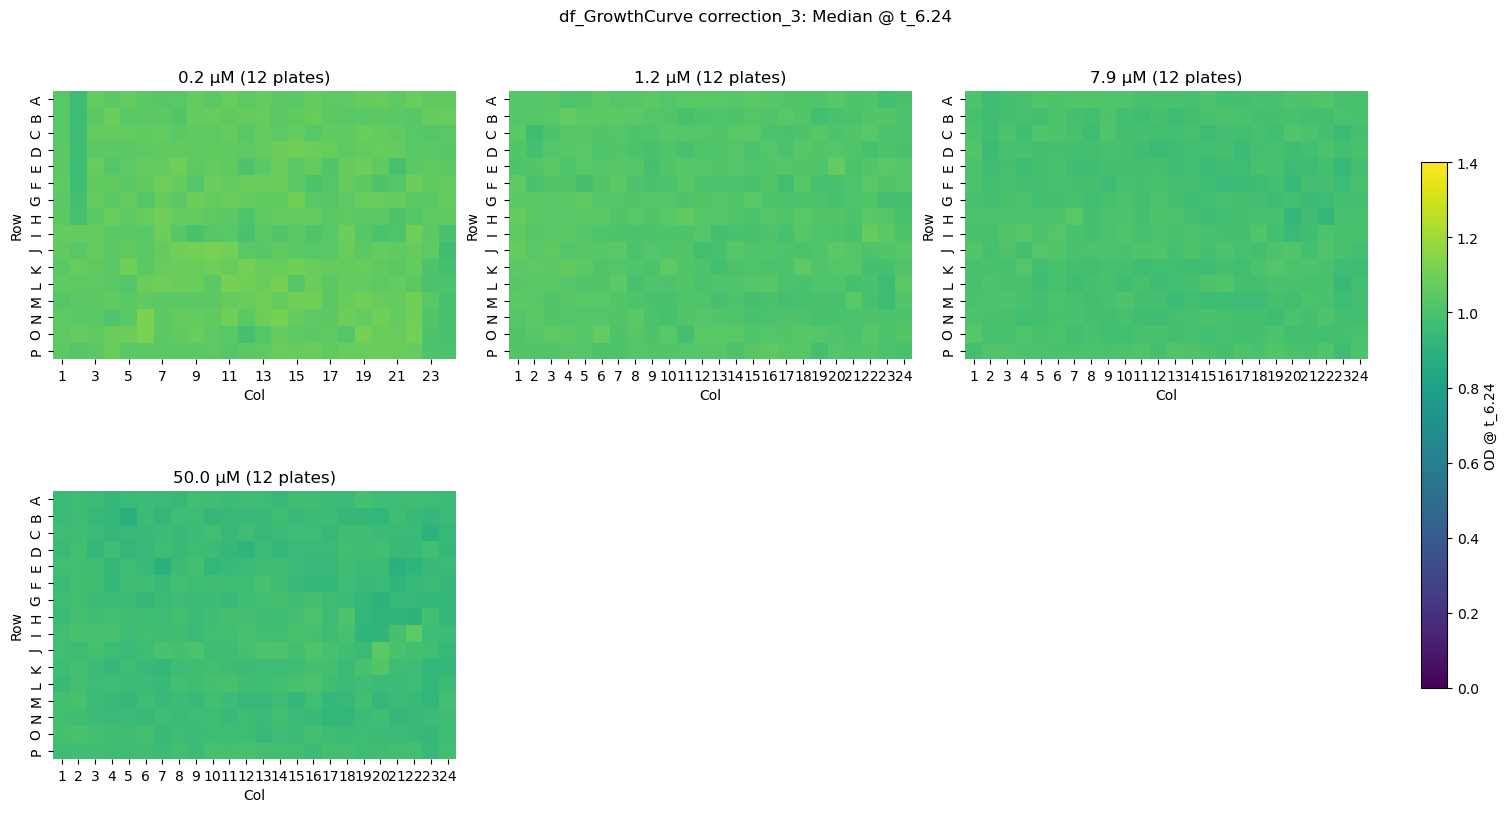

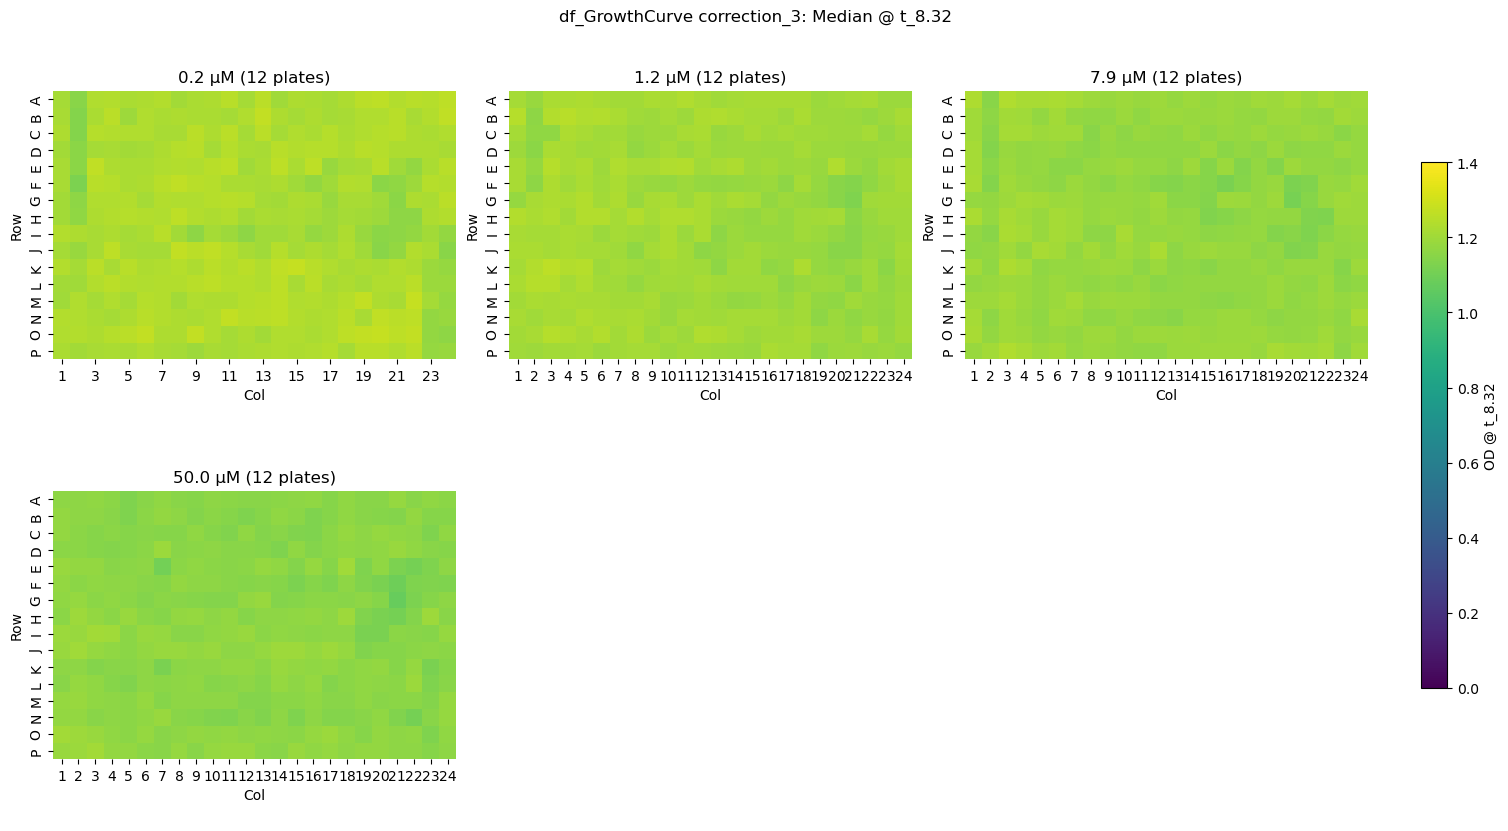

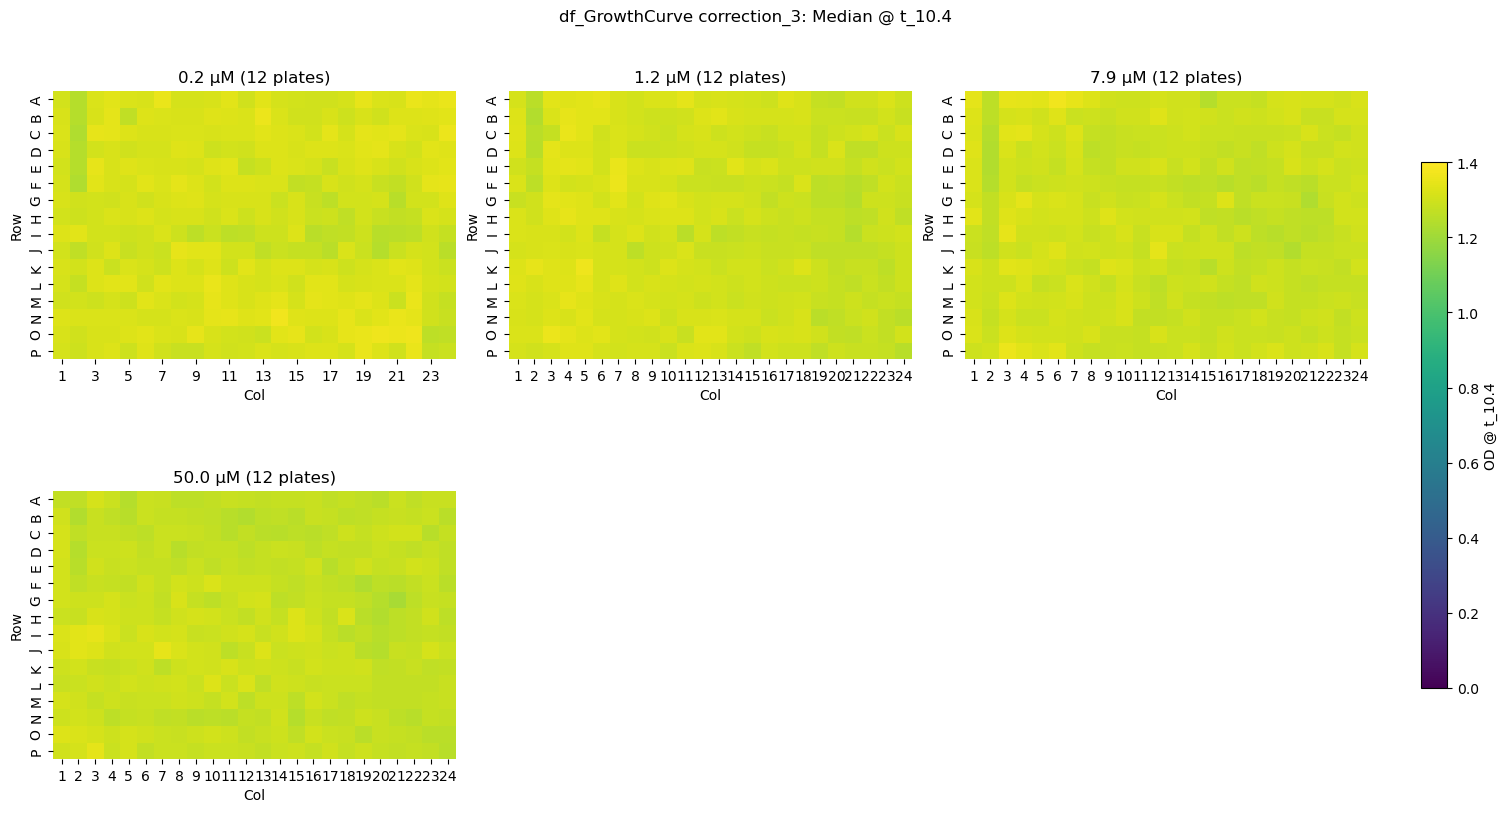

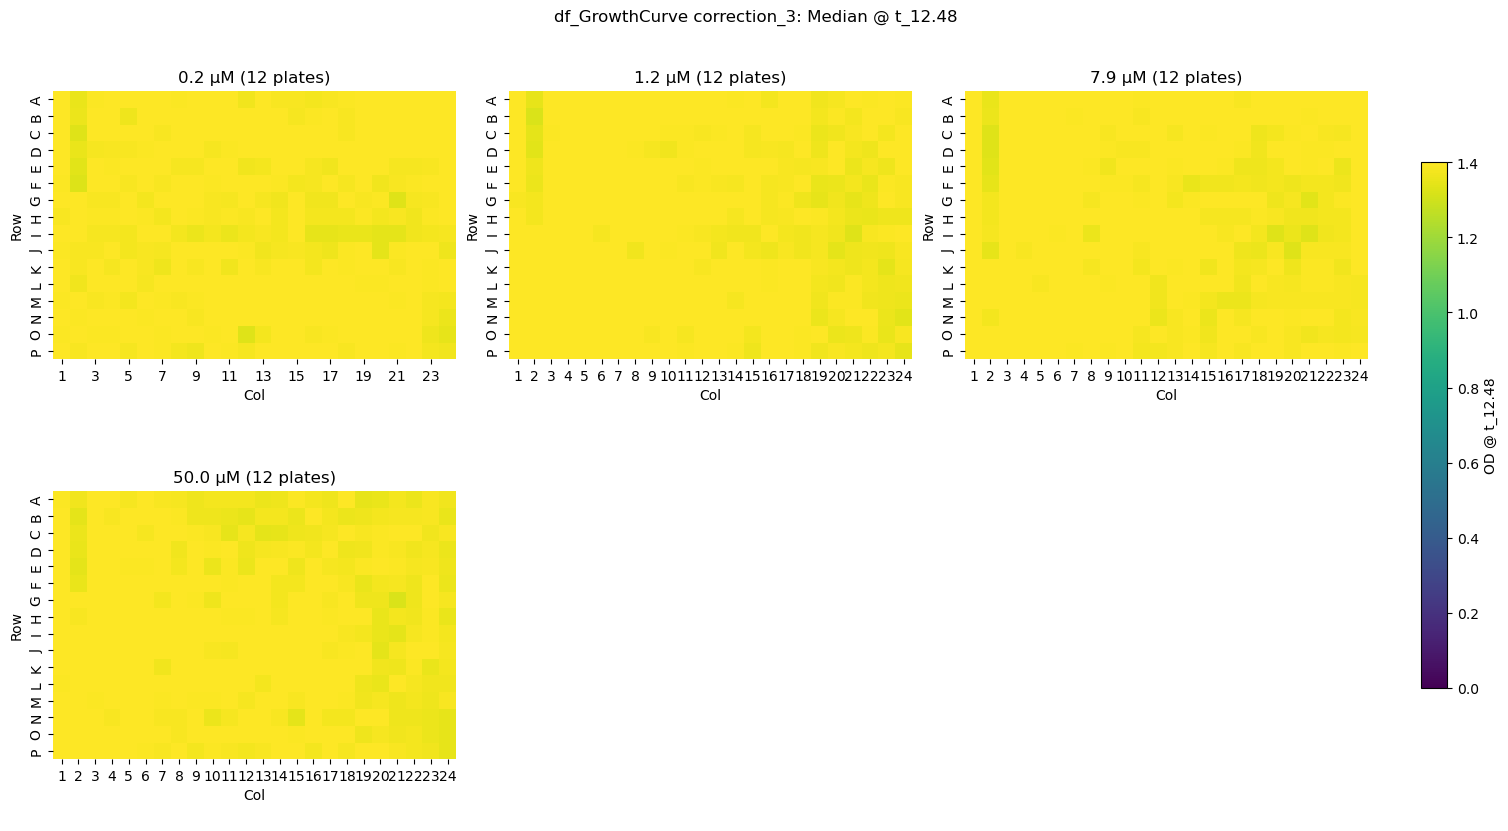

In [60]:
mask_actives_pos_controls = (df_plate_well_corrected_1['is_Active'] == 1) | (df_plate_well_corrected_1['Control_Label'] == 1)

df_plate_well_corrected_1_no_active_pos = df_plate_well_corrected_1.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_3',
        dataset='df_GrowthCurve',
        df_long=df_plate_well_corrected_1_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.40,
    )

In [ ]:
mask_actives_pos_controls = (df_plate_well_corrected_2['is_Active'] == 1) | (df_plate_well_corrected_2['Control_Label'] == 1)

df_plate_well_corrected_2_no_active_pos = df_plate_well_corrected_2.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_4',
        dataset='df_GrowthCurve',
        df_long=df_plate_well_corrected_1_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.40,
    )

## OD distributions at concentrations

In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #1'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_1',
        dataset='df_GrowthCurve',
        df_long=df_well_corrected_1,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8)


In [240]:
df_well_corrected_1

Well Plate_ID  Concentration                  Compound  Control_Label  \
0       A01      546            0.2                      DMSO             -1   
1       A02      546            0.2                      DMSO             -1   
2       A03      546            0.2  Polyoxyethylene stearate              0   
3       A04      546            0.2       Lefamulin (acetate)              0   
4       A05      546            0.2       Cefodizime (sodium)              0   
...     ...      ...            ...                       ...            ...   
129019  P20      S10            7.9                      DMSO             -1   
129020  P21      S10            7.9                      DMSO             -1   
129021  P22      S10            7.9                      DMSO             -1   
129022  P23      S10            7.9                      DMSO             -1   
129023  P24      S10            7.9                      DMSO             -1   

                                                   Smiles Timepoint        OD  \
0                                                     NaN       t_0  0.000000   
1                                                     NaN       t_0  0.000000   
2             O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]       t_0  0.000000   
3       CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...       t_0  0.000000   
4       O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...       t_0  0.000000   
...                                                   ...       ...       ...   
129019                                                NaN   t_12.48  0.974373   
129020                                                NaN   t_12.48  0.992481   
129021                                                NaN   t_12.48  0.988244   
129022                                                NaN   t_12.48  0.980143   
129023                                                NaN   t_12.48  0.950396   

        threshold  is_Active  
0        0.000000          0  
1        0.000000          0  
2        0.000000          0  
3        0.000000          0  
4        0.000000          0  
...           ...        ...  
129019   0.969925          0  
129020   0.969925          0  
129021   0.969925          0  
129022   0.969925          0  
129023   0.969925          0  

[129024 rows x 10 columns]

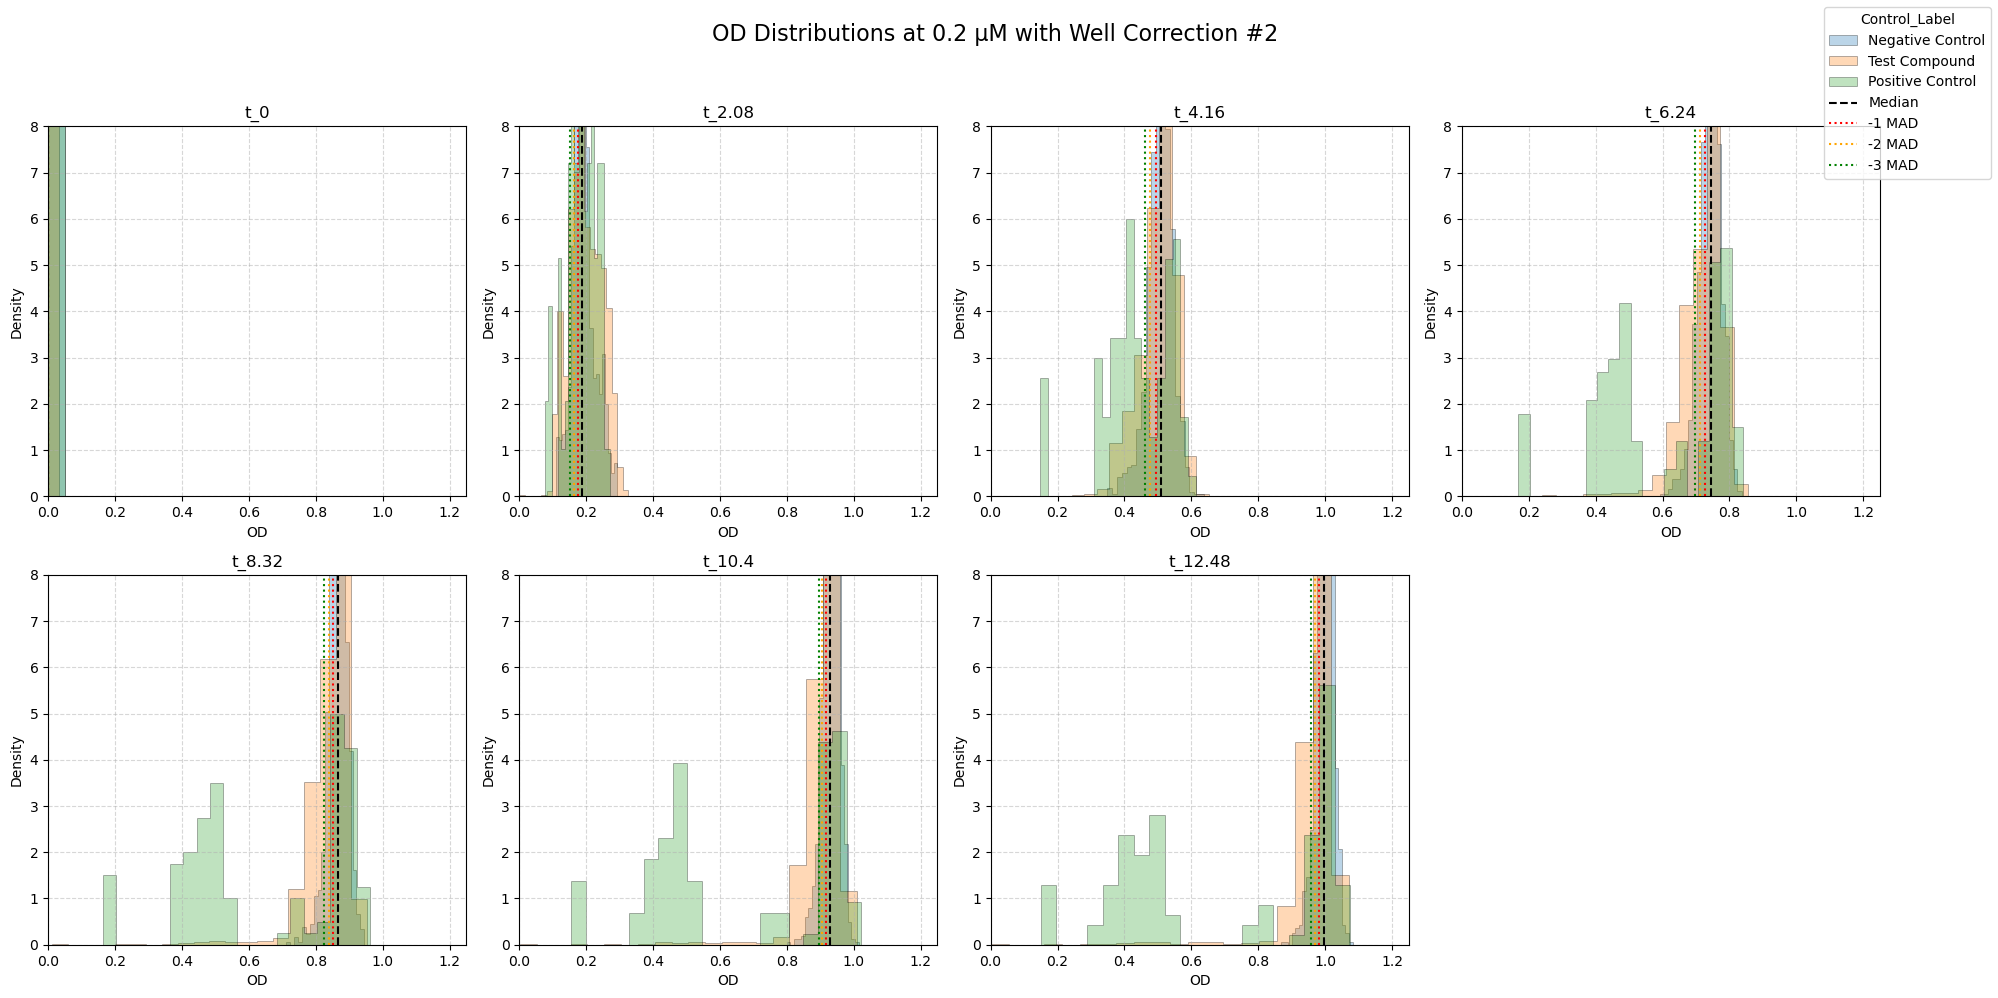

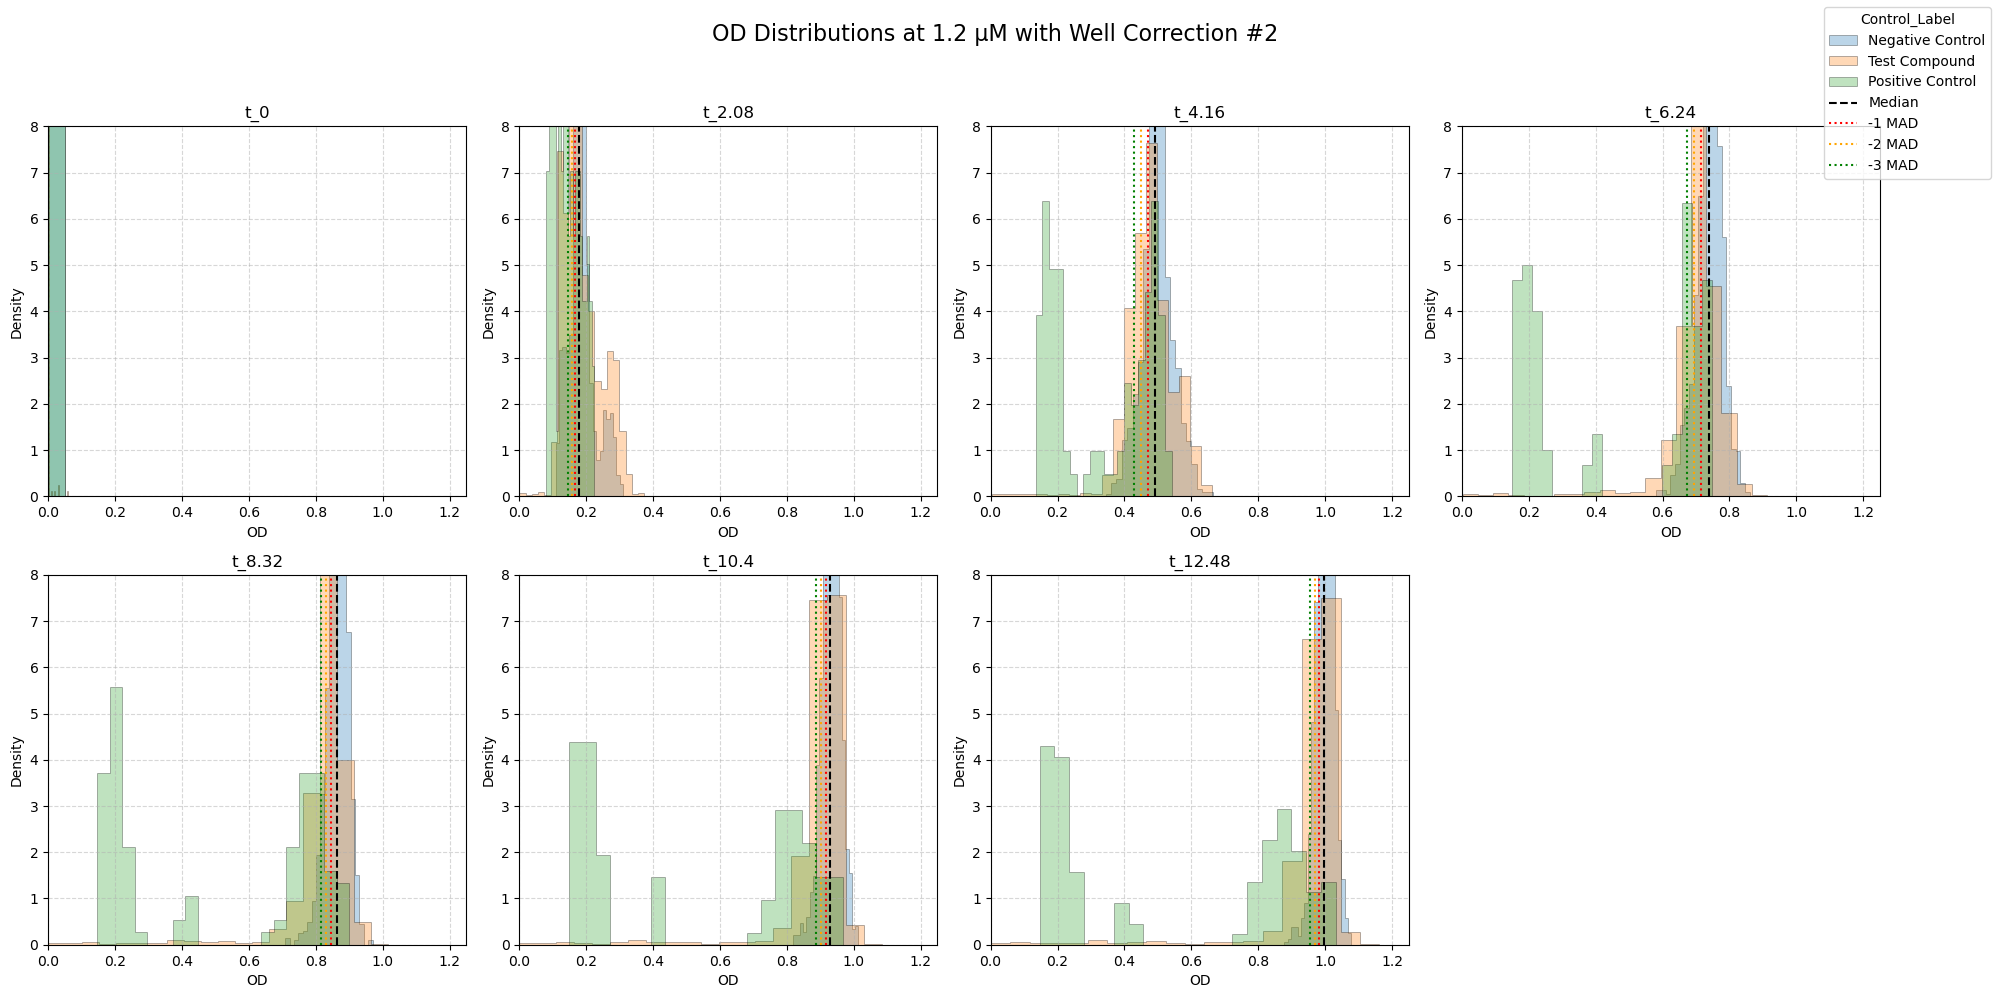

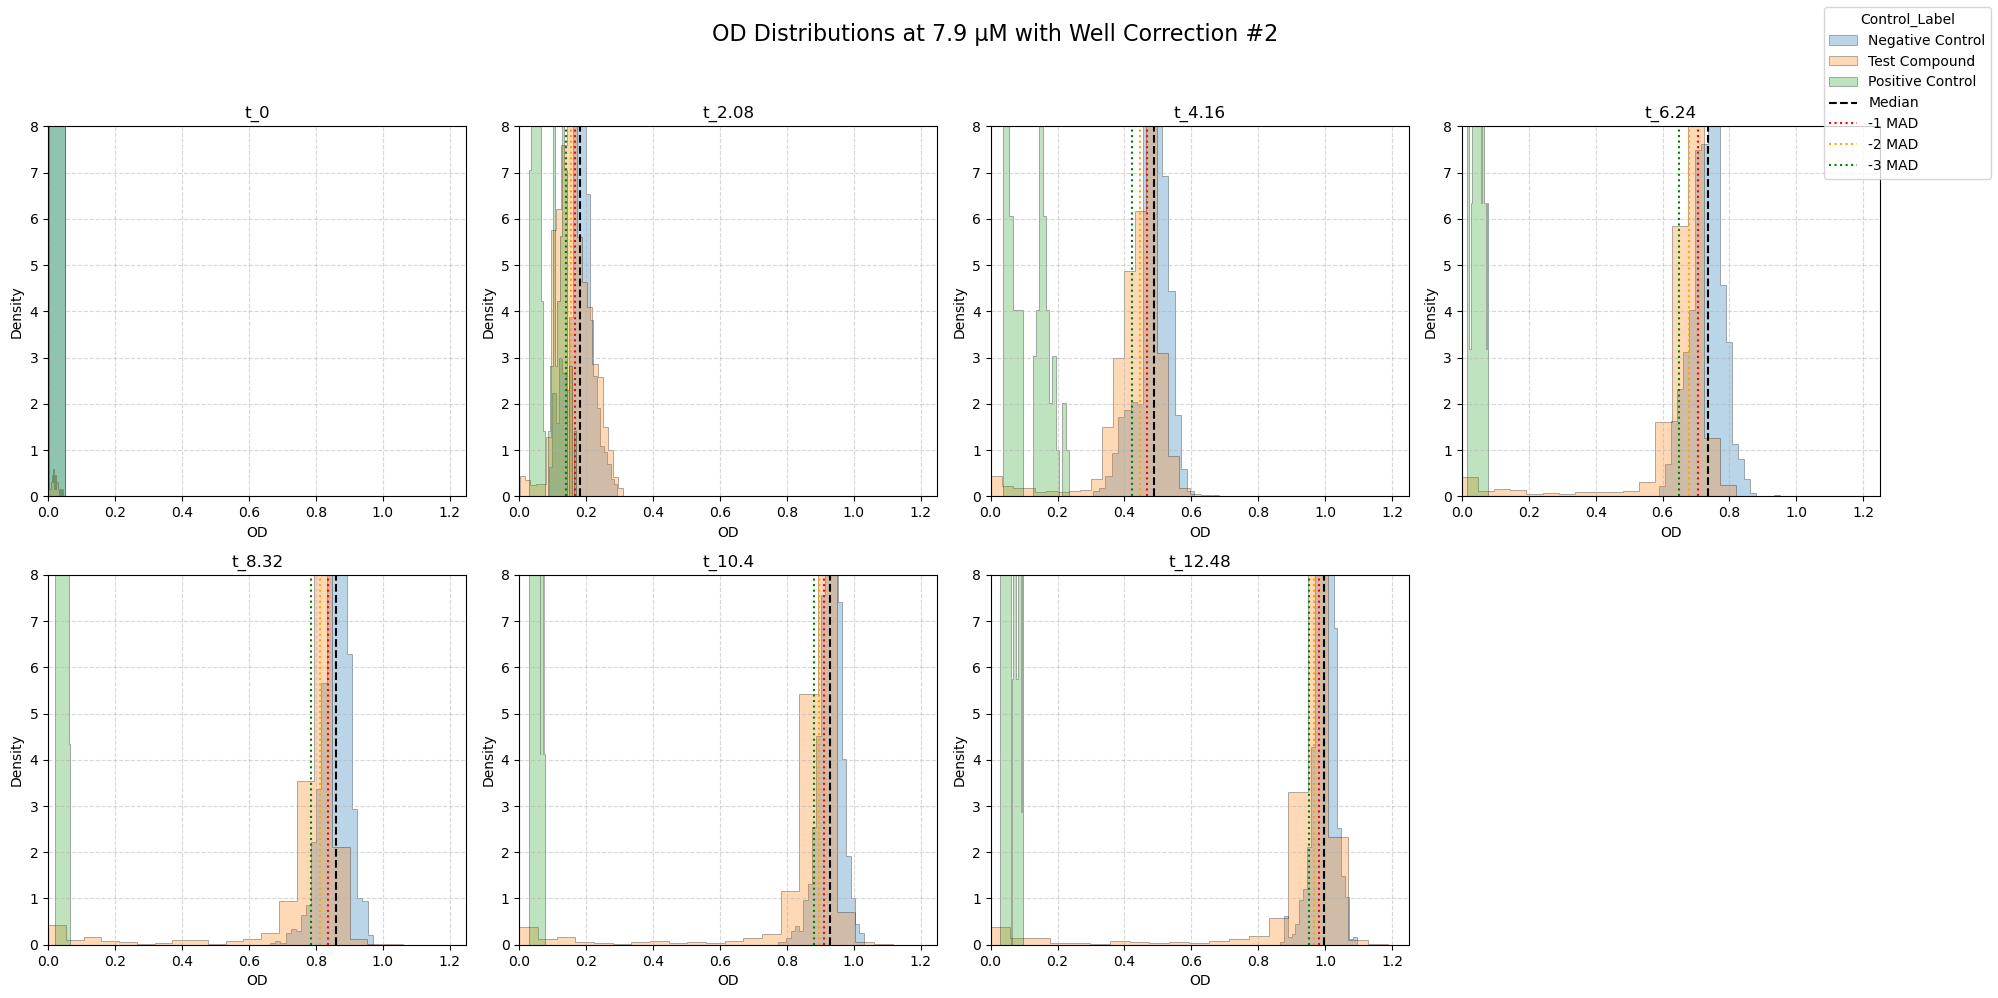

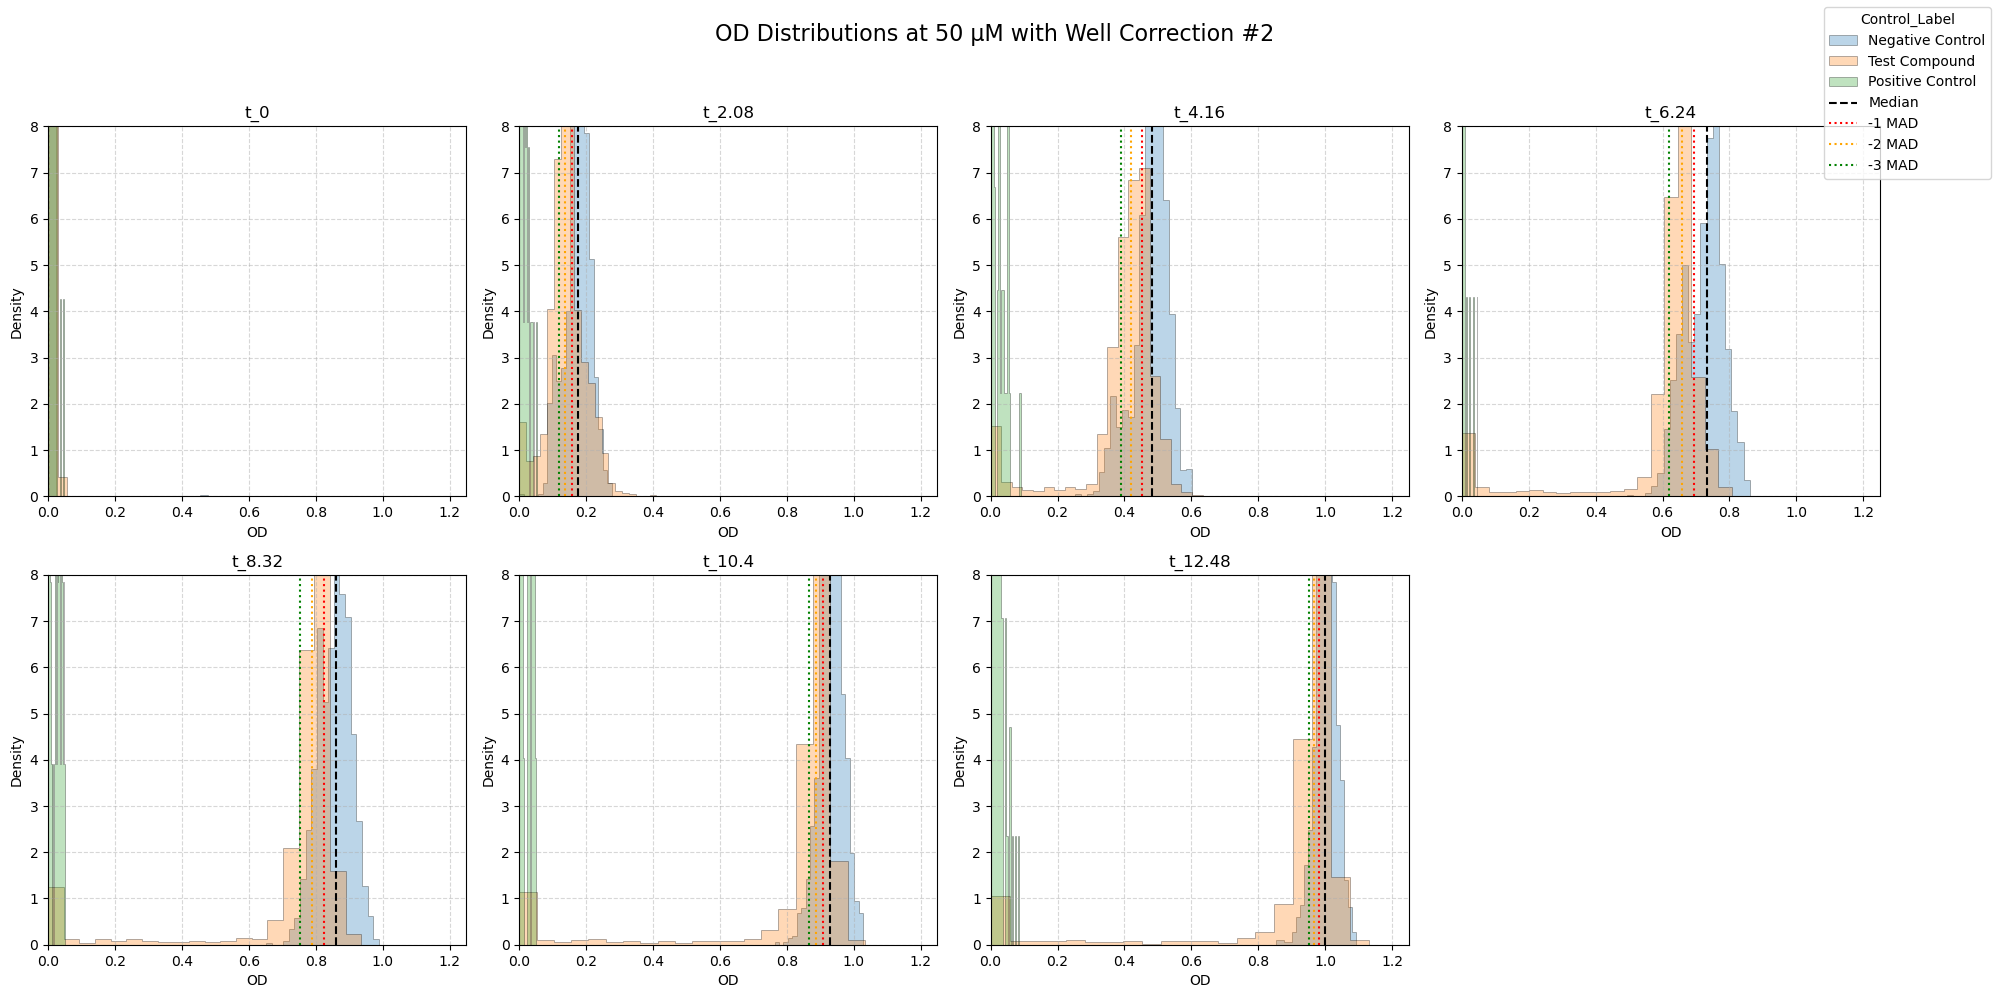

In [71]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #2'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_2',
        dataset='df_GrowthCurve',
        df_long=df_well_corrected_2,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8)

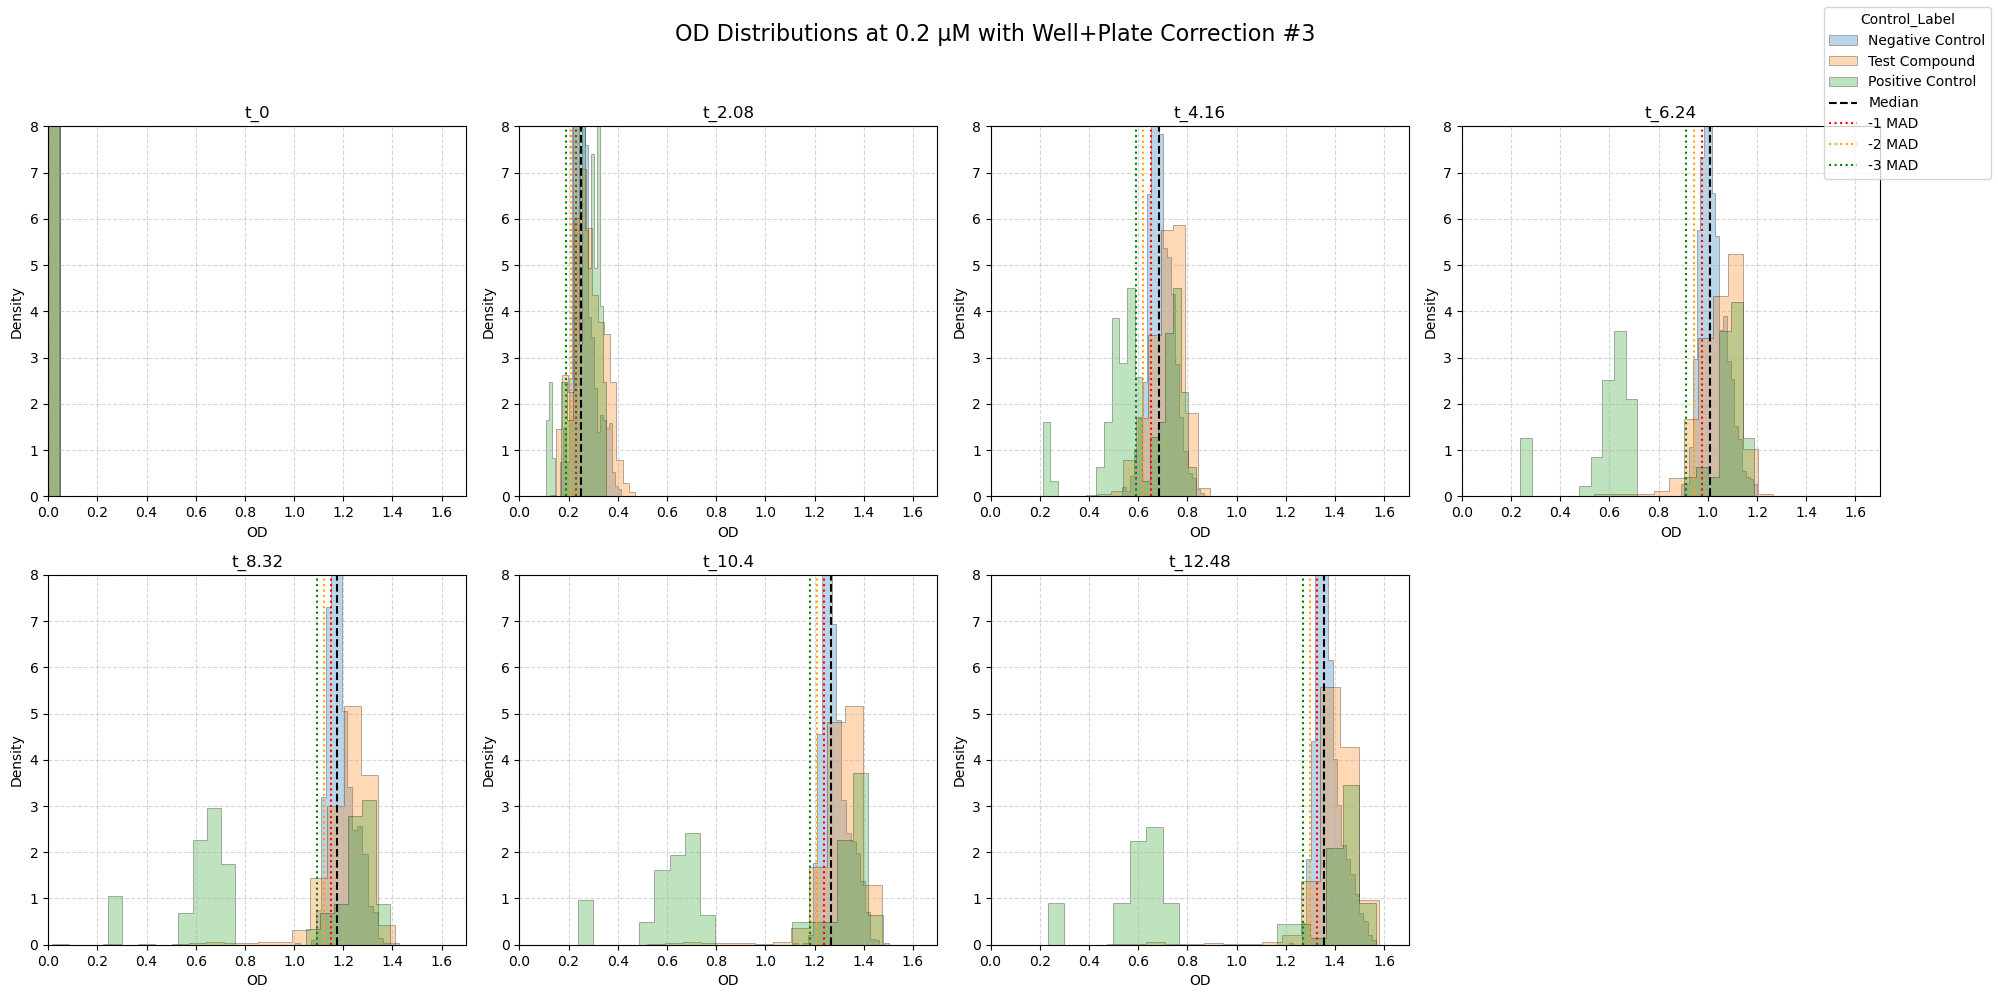

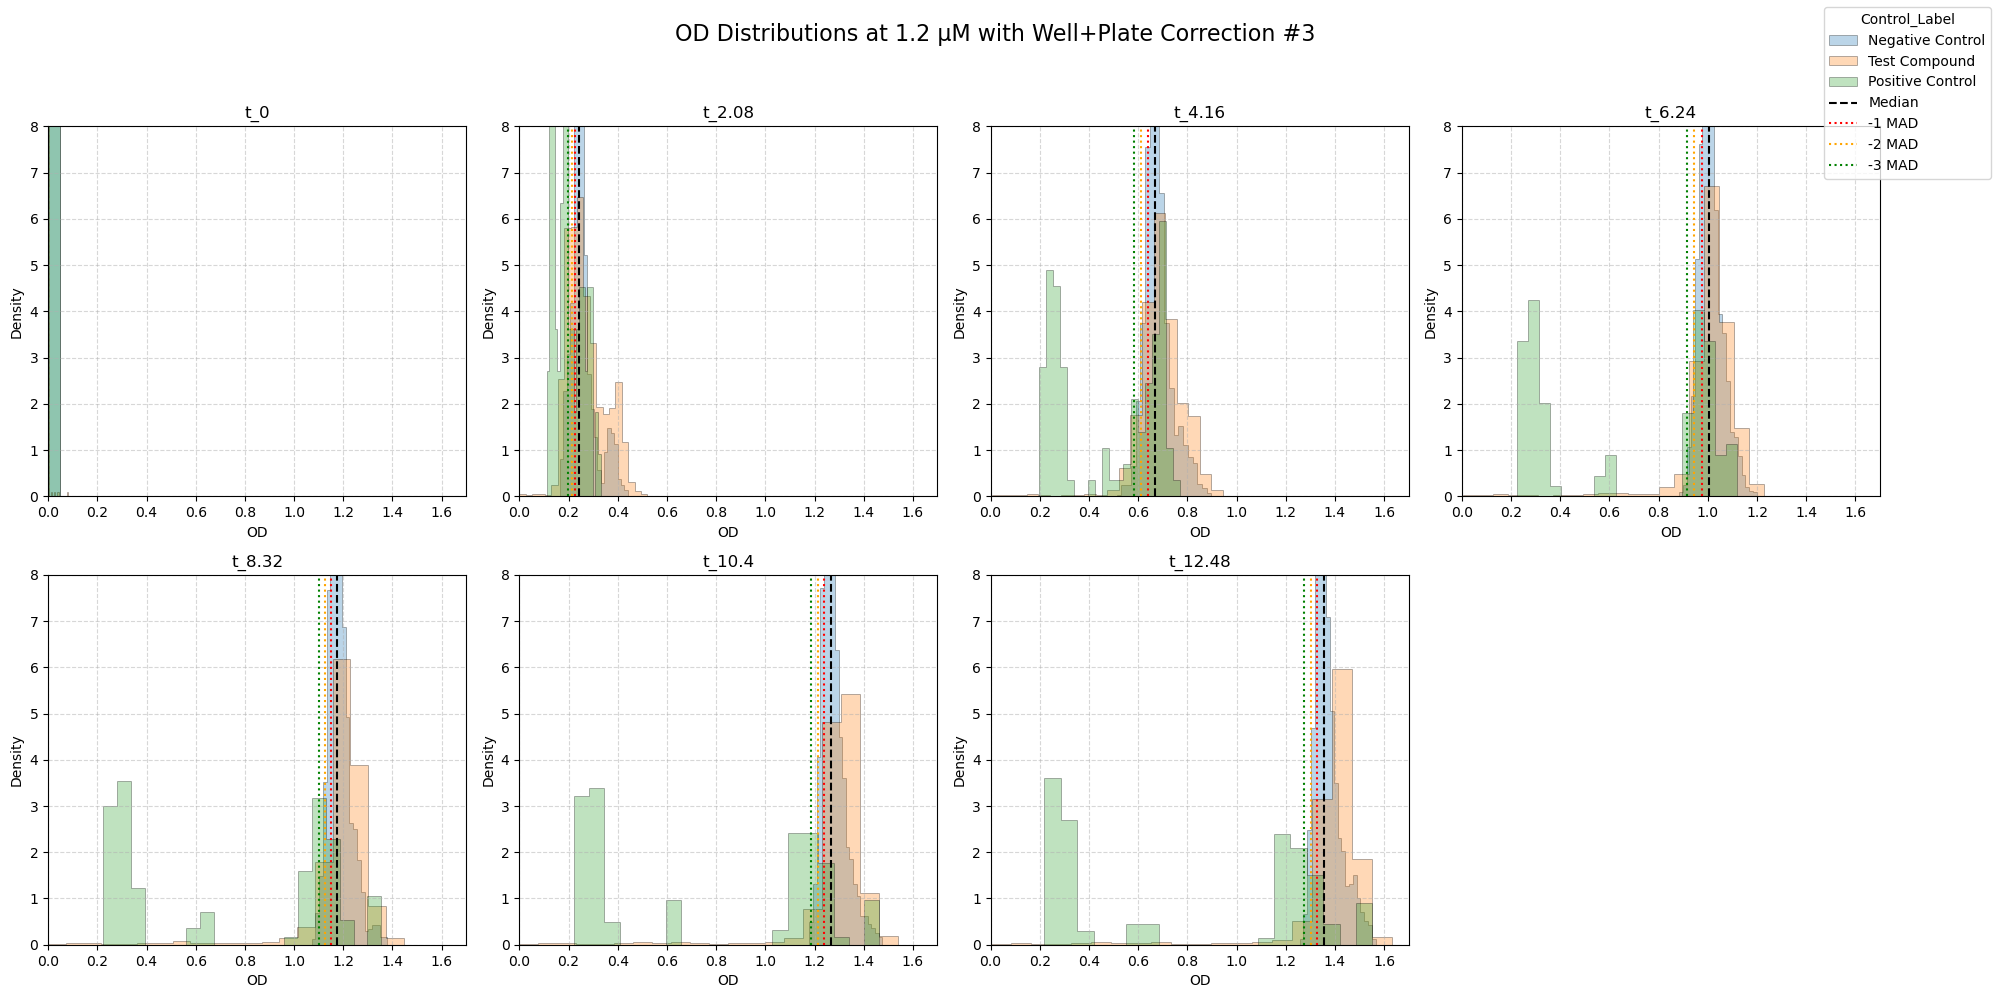

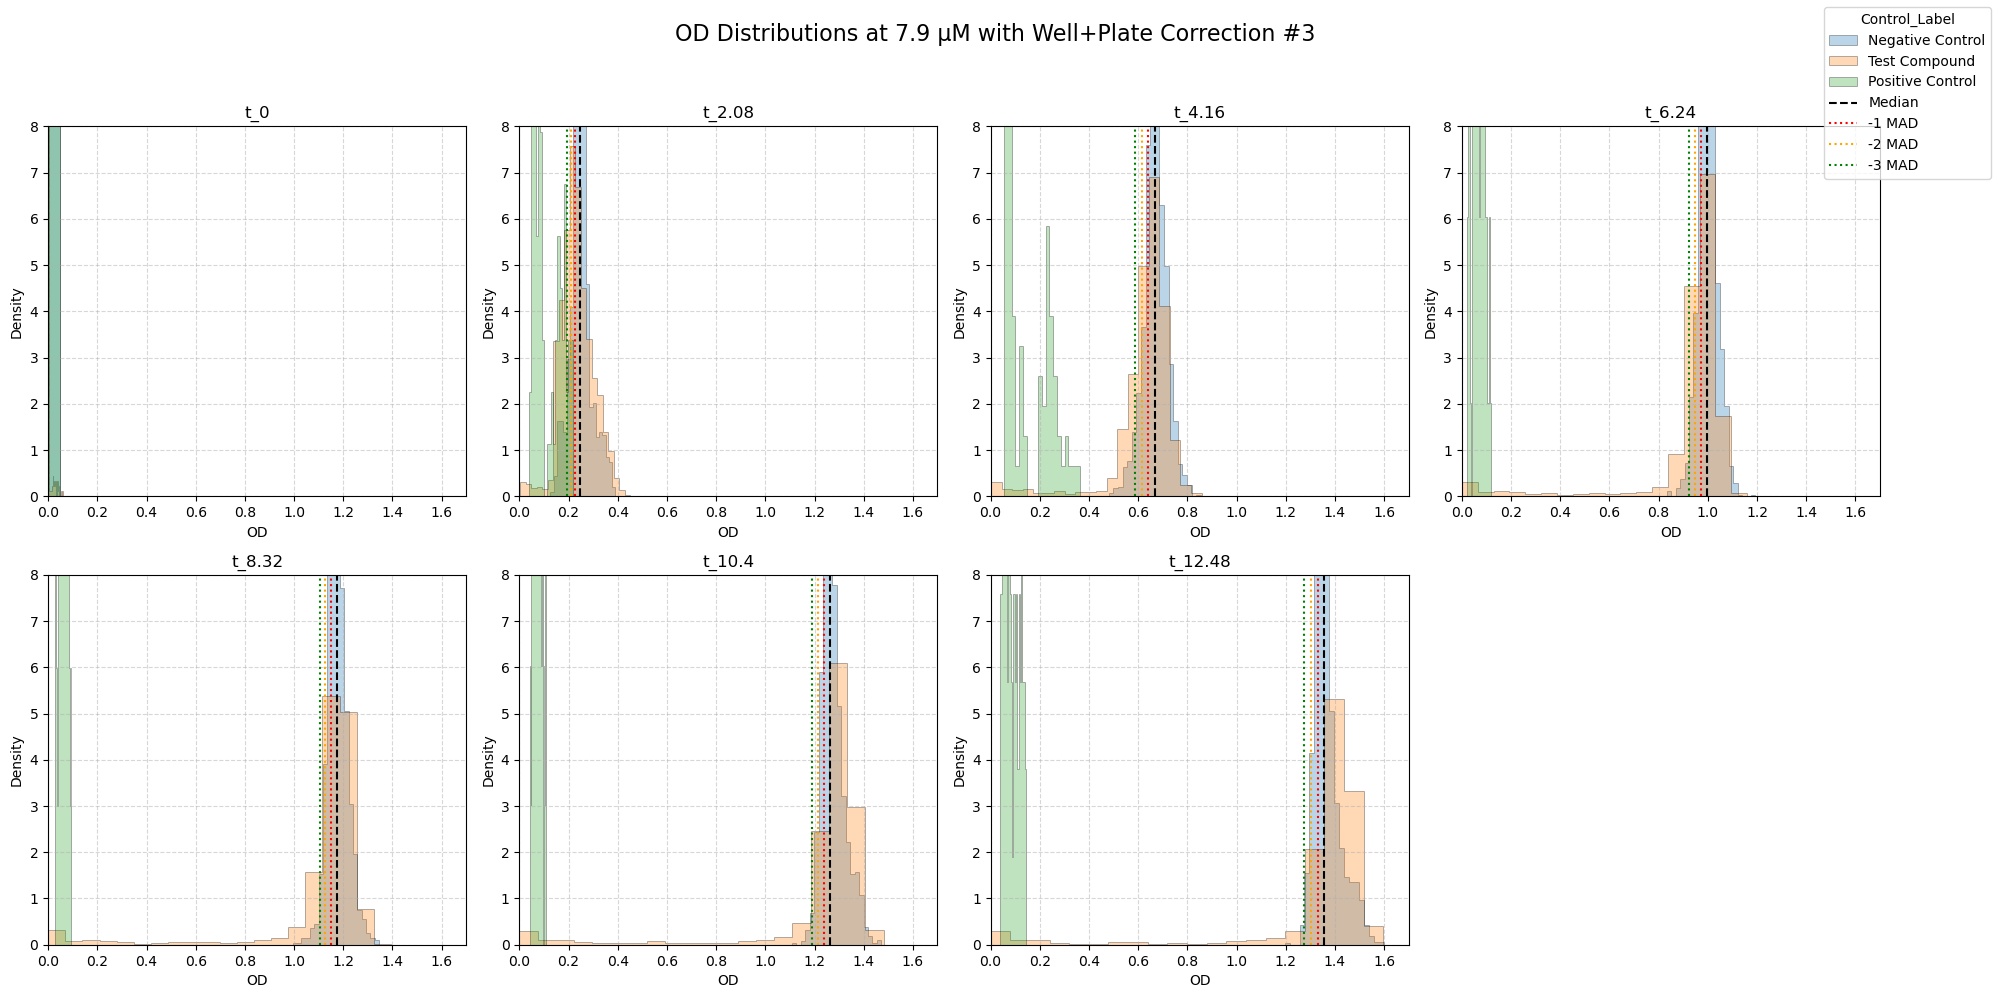

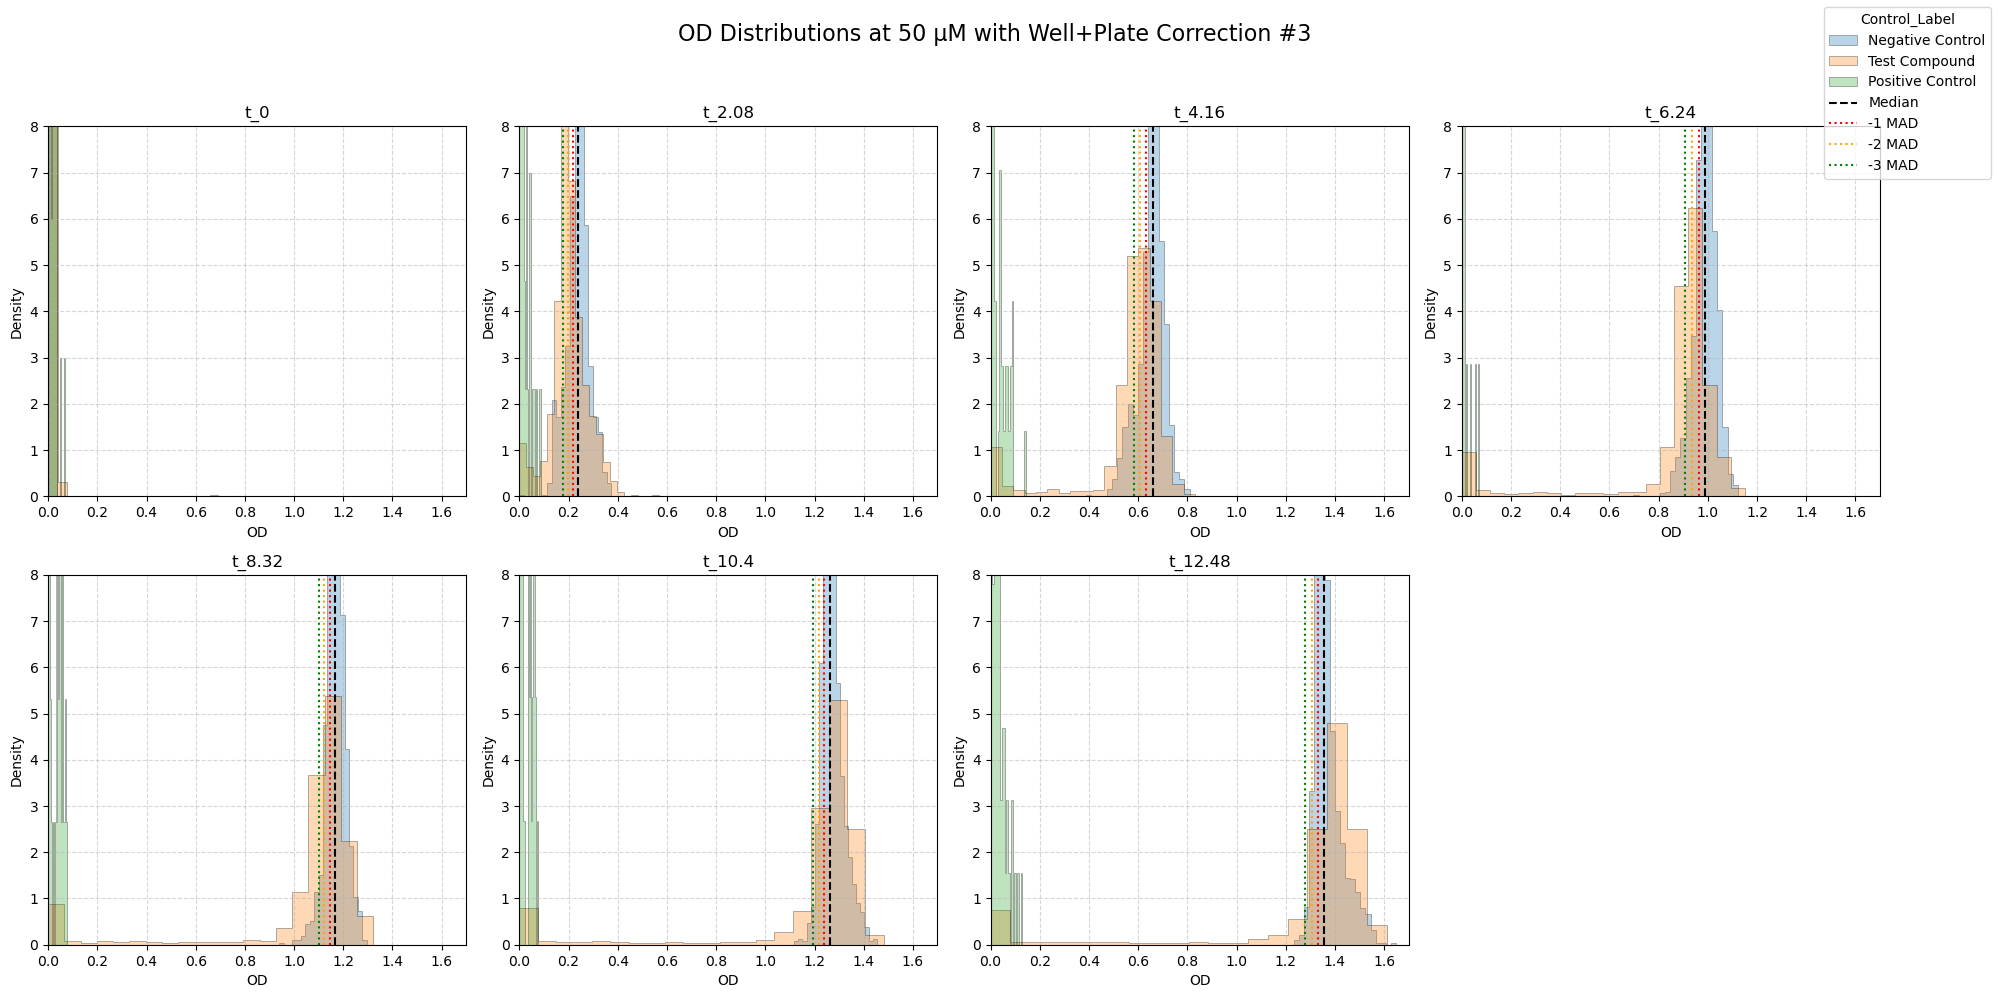

In [72]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well+Plate Correction #3'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_3',
        dataset='df_GrowthCurve',
        df_long=df_plate_well_corrected_1,
        concentration=c,
        bins=custom_bins, 
        max_x=1.7,
        max_density=8)

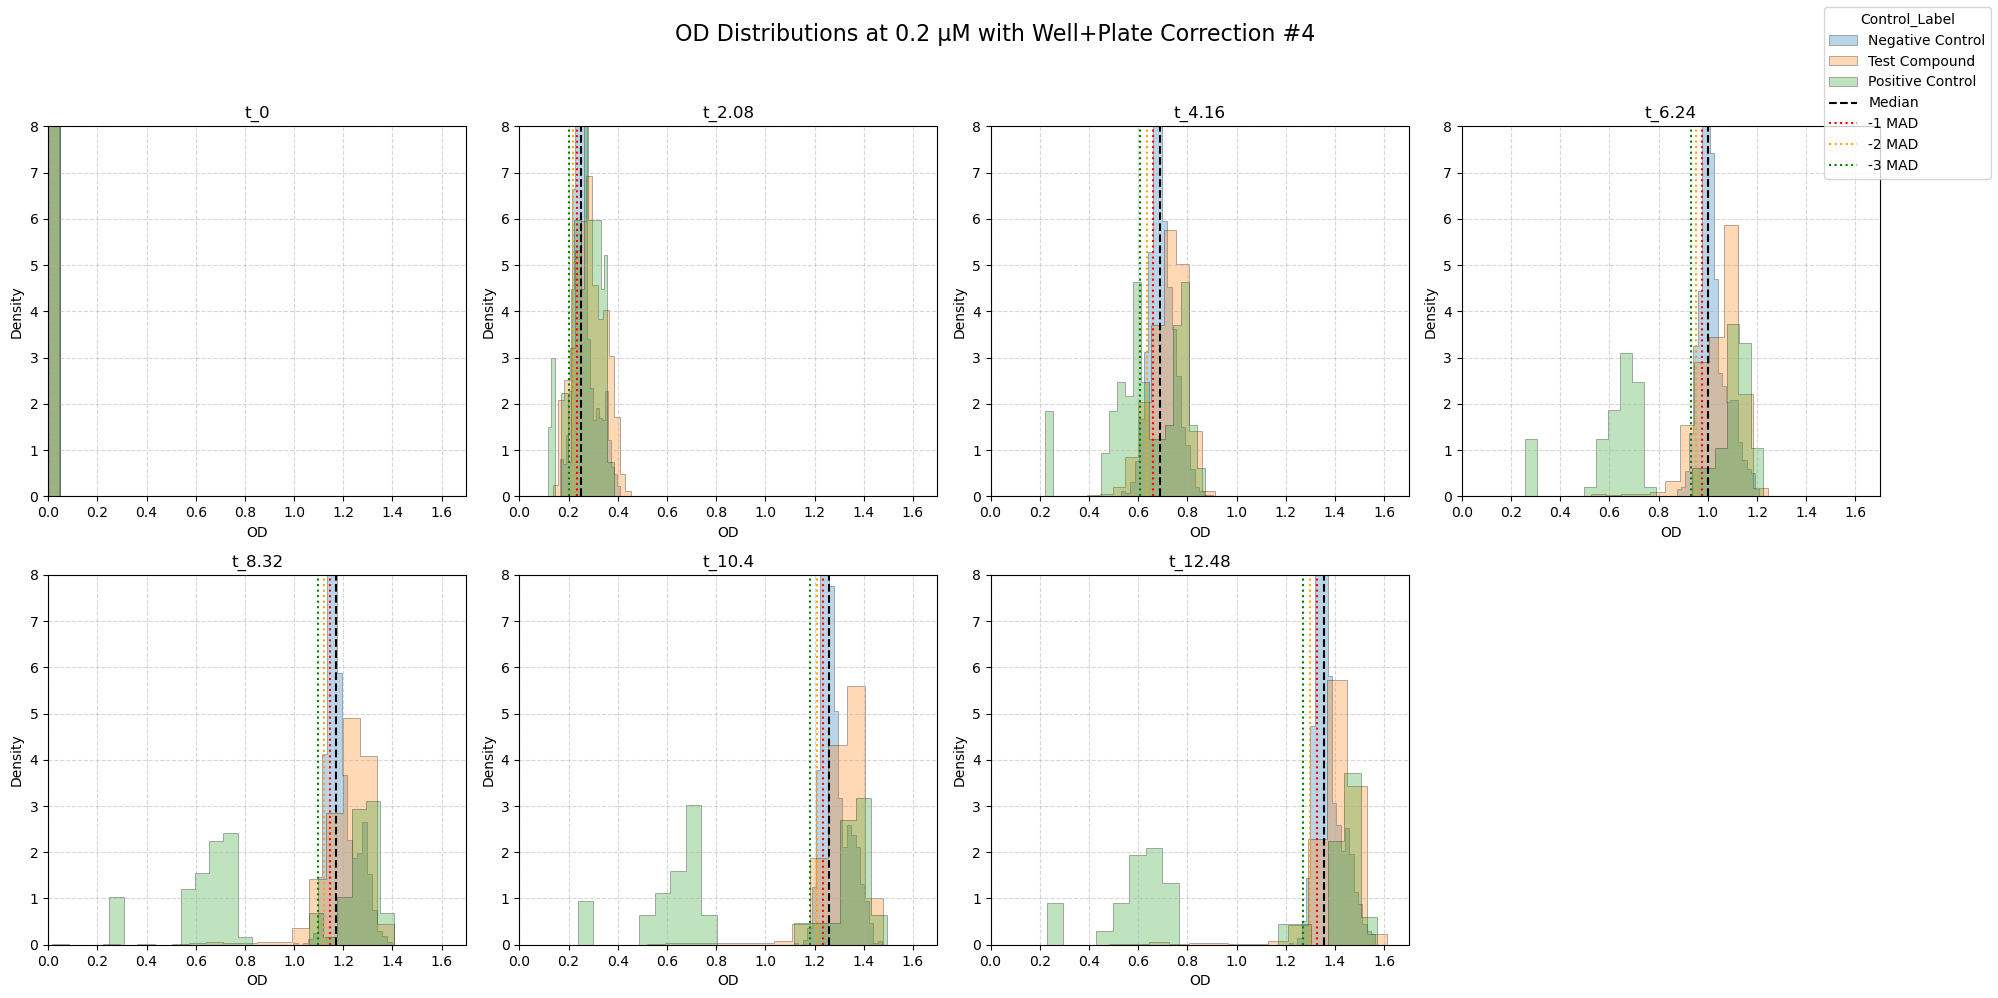

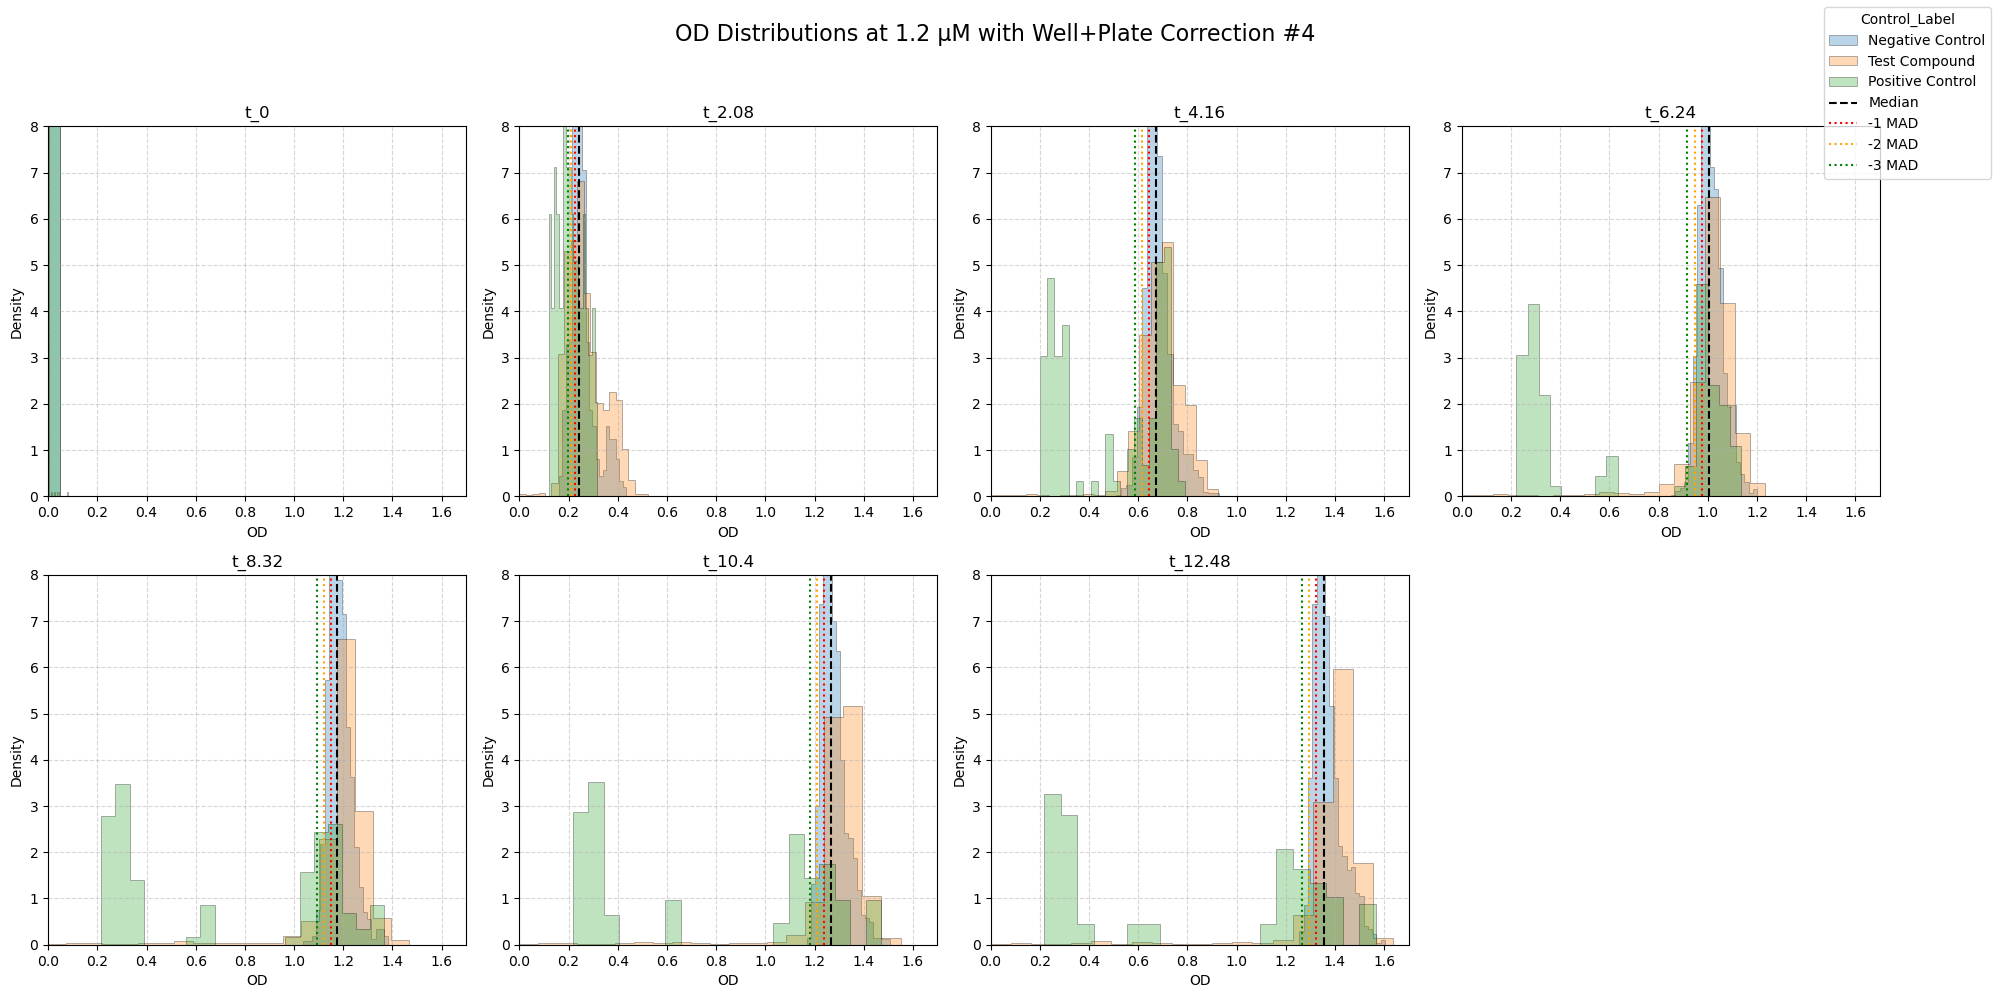

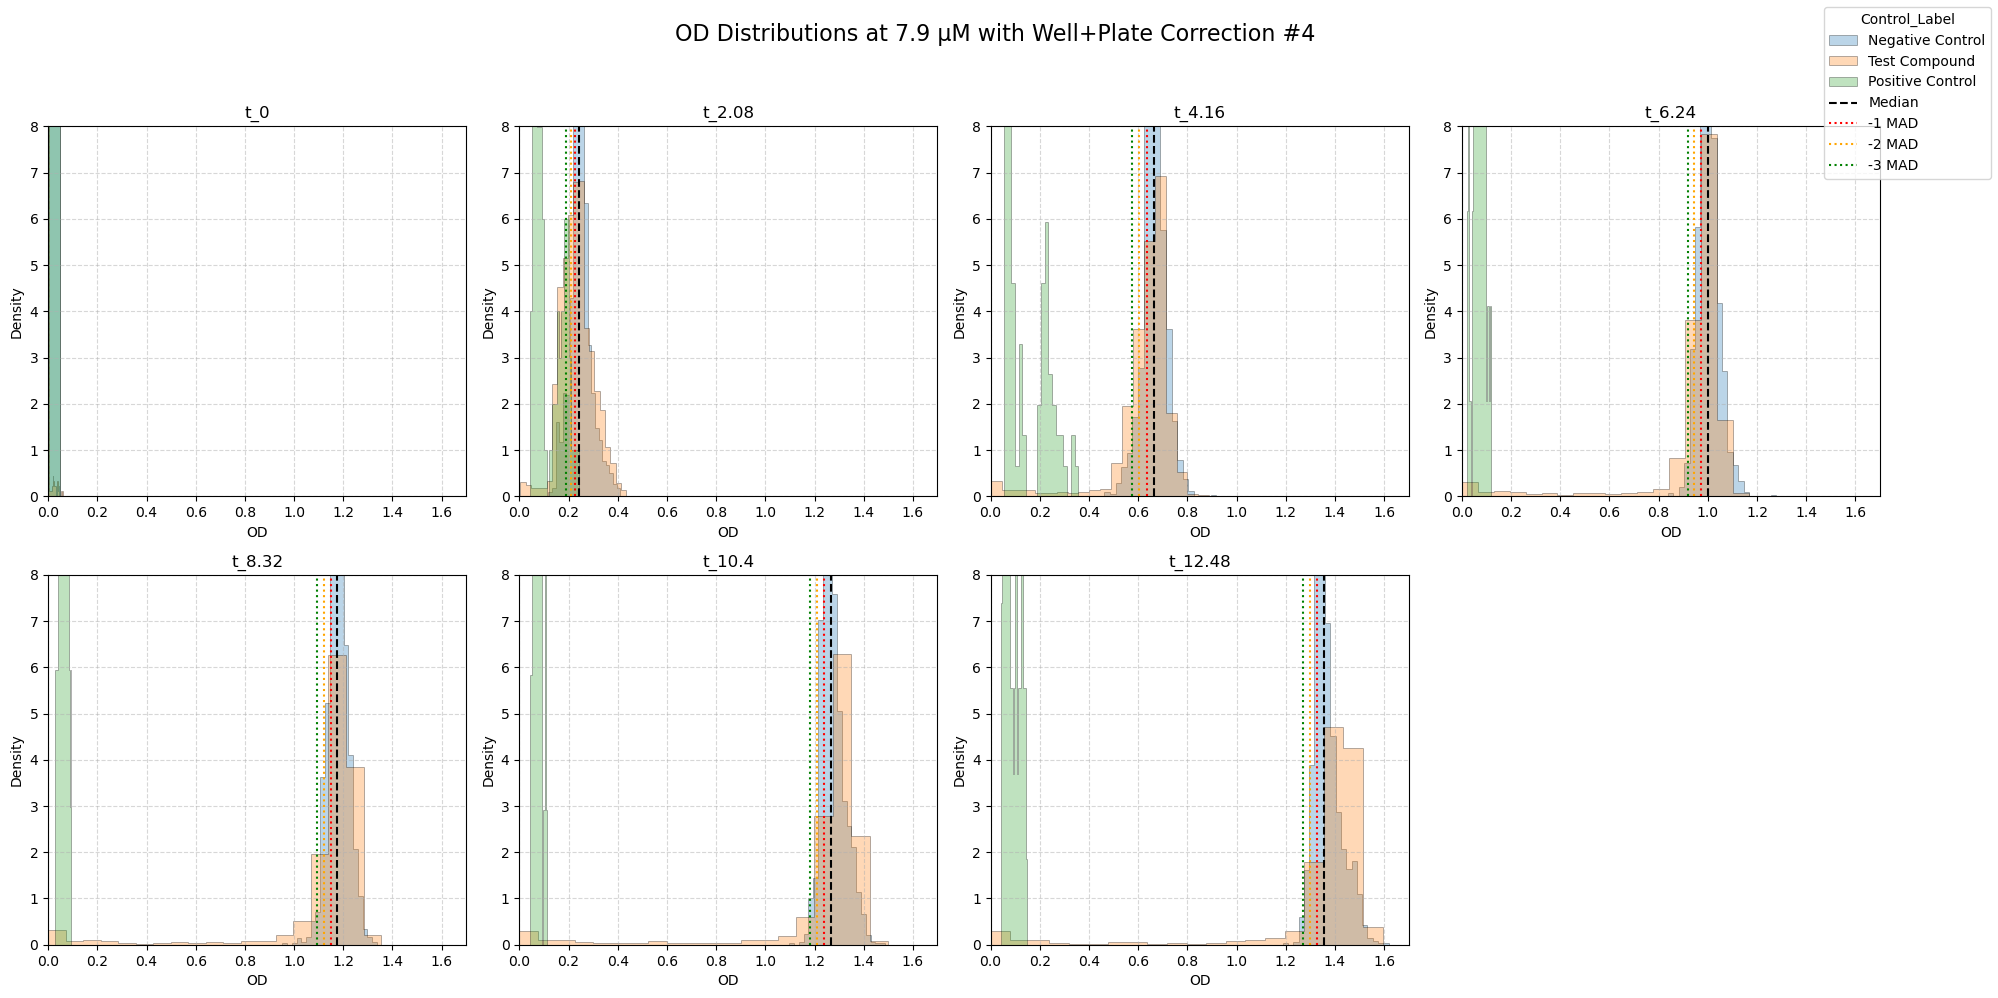

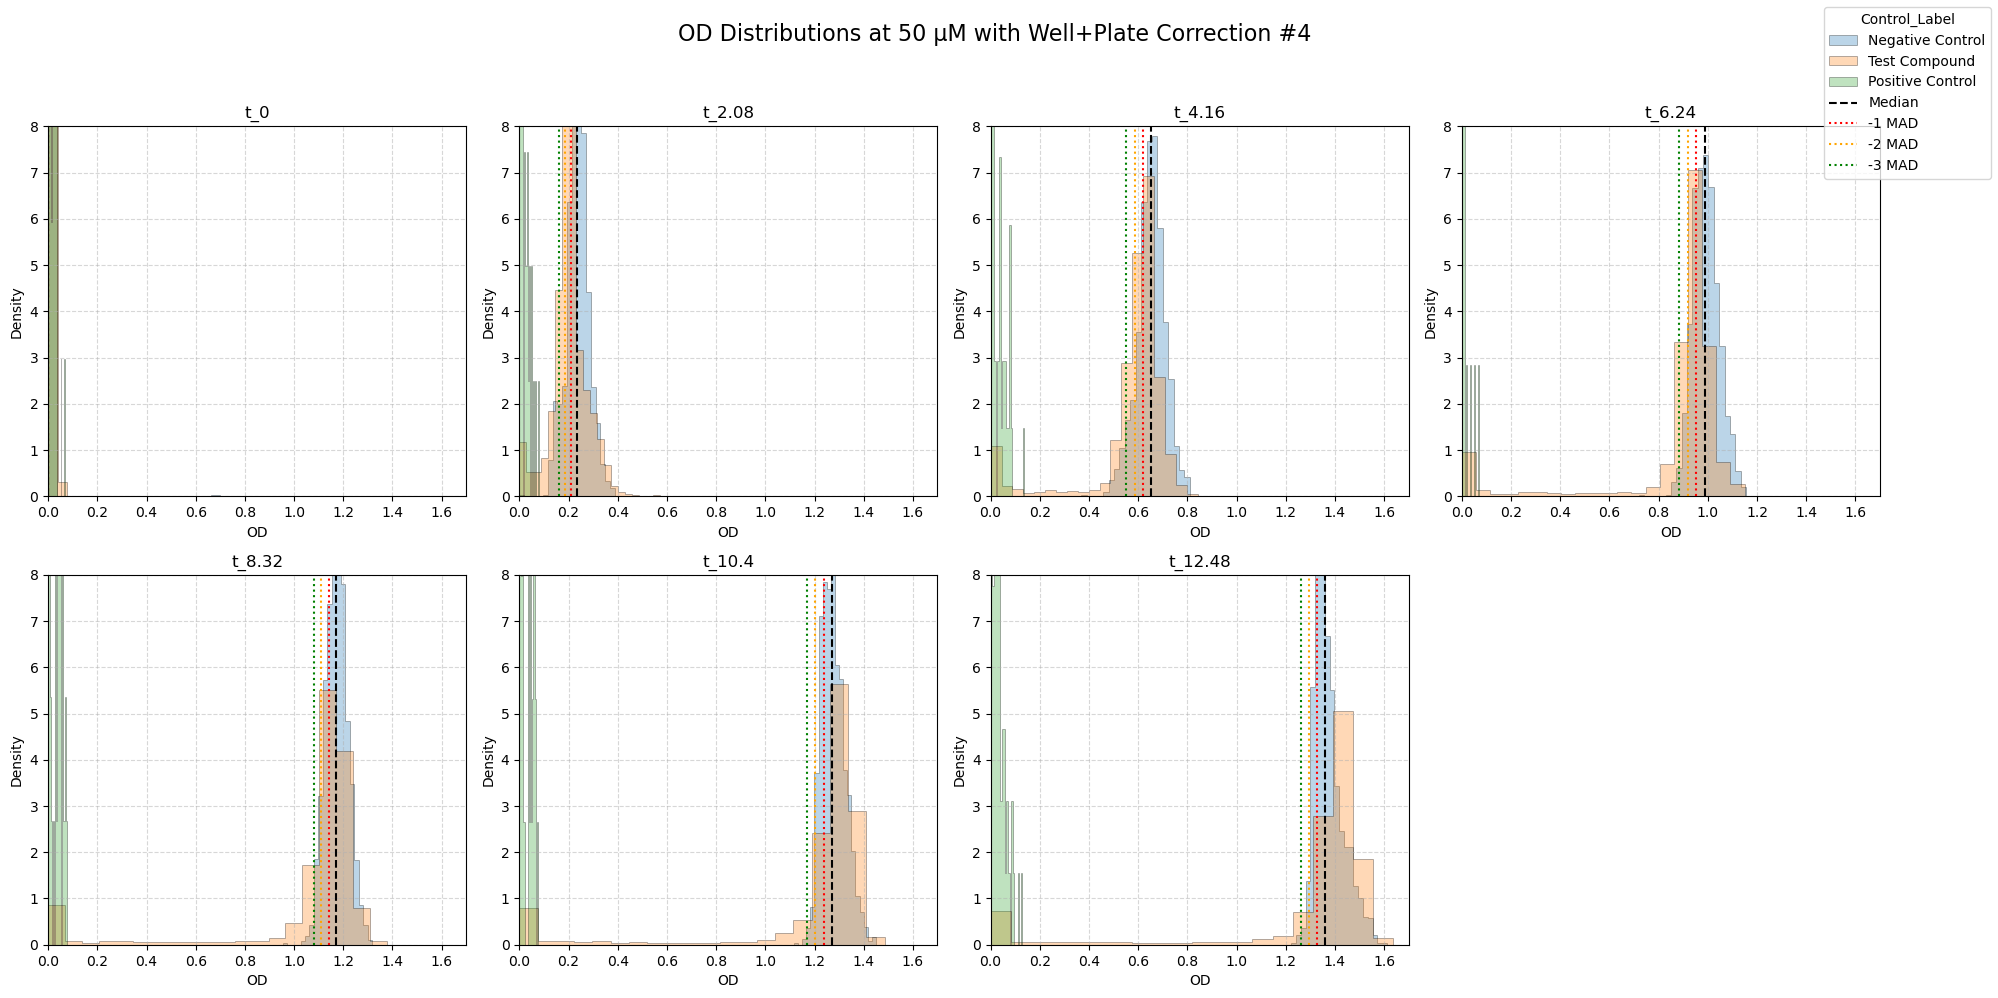

In [73]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well+Plate Correction #4'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_4',
        dataset='df_GrowthCurve',
        df_long=df_plate_well_corrected_2,
        concentration=c,
        bins=custom_bins, 
        max_x=1.7,
        max_density=8)

Need to average across Replicates

# Enamine t6 t12 processing

In [260]:
df=pd.concat([df_Enamine_t6_t12_controls,df_Enamine_t6_t12_wells], ignore_index=True)

In [264]:
df

Well Replicate       Compound       t_0    t_6.24   t_12.48  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
76795  M05      OD_C    Z3342561431  0.000000  0.523054  0.920575   
76796  H15      OD_C    Z1459426305  0.000000  0.538745  1.019955   
76797  A05      OD_C    Z6191966153  0.000000  0.564898  1.035647   
76798  N17      OD_C    Z2396635673  0.000000  0.533515  0.993802   
76799  O11      OD_C    Z3019358249  0.000000  0.682585  1.093183   

                                                 Smiles          Plate_ID  \
0                                                   NaN  1886318-Y12-A081   
1          1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                                   NaN  1886318-Y12-A081   
3                                                   NaN  1886318-Y12-A081   
4                                                   NaN  1886318-Y12-A081   
...                                                 ...               ...   
76795      CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4  1886318-Y12-A100   
76796                 CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2  1886318-Y12-A100   
76797          CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN  1886318-Y12-A100   
76798  CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3  1886318-Y12-A100   
76799   NCC=1C=CC2=NC(=CN2C1)C(=O)N3CCCC3C=4C=CC(F)=CC4  1886318-Y12-A100   

       Concentration  Control_Label  
0                 50             -1  
1                 50              1  
2                 50             -1  
3                 50             -1  
4                 50             -1  
...              ...            ...  
76795             50              0  
76796             50              0  
76797             50              0  
76798             50              0  
76799             50              0  

[76800 rows x 10 columns]

In [271]:
n_nan = df.loc[df['Compound'] == 'Ciprofloxacin', 't_12.48'].isna().sum()
print("NaNs:", n_nan)

NaNs: 0


In [214]:
df

Well Replicate       Compound       t_0    t_6.24   t_12.48  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
76795  M05      OD_C    Z3342561431  0.000000  0.523054  0.920575   
76796  H15      OD_C    Z1459426305  0.000000  0.538745  1.019955   
76797  A05      OD_C    Z6191966153  0.000000  0.564898  1.035647   
76798  N17      OD_C    Z2396635673  0.000000  0.533515  0.993802   
76799  O11      OD_C    Z3019358249  0.000000  0.682585  1.093183   

                                                 Smiles          Plate_ID  \
0                                                   NaN  1886318-Y12-A081   
1          1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                                   NaN  1886318-Y12-A081   
3                                                   NaN  1886318-Y12-A081   
4                                                   NaN  1886318-Y12-A081   
...                                                 ...               ...   
76795      CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4  1886318-Y12-A100   
76796                 CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2  1886318-Y12-A100   
76797          CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN  1886318-Y12-A100   
76798  CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3  1886318-Y12-A100   
76799   NCC=1C=CC2=NC(=CN2C1)C(=O)N3CCCC3C=4C=CC(F)=CC4  1886318-Y12-A100   

       Concentration  Control_Label  
0                 50             -1  
1                 50              1  
2                 50             -1  
3                 50             -1  
4                 50             -1  
...              ...            ...  
76795             50              0  
76796             50              0  
76797             50              0  
76798             50              0  
76799             50              0  

[76800 rows x 10 columns]

Add active inactive labels

In [272]:
df,_=label_inactives_actives(df,dataset='df_Enamine_t6_t12', mad_multiplier=3)

In [277]:
df[(df['Compound'] == 'Ciprofloxacin') & (df['Timepoint'] == 't_12.48')]['OD']

153601    0.000000
153605    0.000000
153609    0.000000
153613    0.000000
153617    0.000000
            ...   
166382    0.000000
166386    0.000000
166390    0.000000
166394    0.002615
166398    0.002615
Name: OD, Length: 3200, dtype: float64

In [216]:
df['Replicate'].value_counts()

OD_A    115200
OD_C    115200
Name: Replicate, dtype: int64

In [217]:
df['is_Active'].sum()

13998

In [218]:
df[df['Compound'] == 'Z27542156']

Well          Plate_ID  Concentration   Compound Replicate  \
12807   H03  1886318-Y12-A001             50  Z27542156      OD_A   
44807   J18  1886318-Y12-A001             50  Z27542156      OD_C   
89607   H03  1886318-Y12-A001             50  Z27542156      OD_A   
121607  J18  1886318-Y12-A001             50  Z27542156      OD_C   
166407  H03  1886318-Y12-A001             50  Z27542156      OD_A   
198407  J18  1886318-Y12-A001             50  Z27542156      OD_C   

        Control_Label                                           Smiles  \
12807               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
44807               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
89607               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
121607              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
166407              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
198407              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   

       Timepoint        OD  threshold  is_below_thresh  is_Active  
12807        t_0  0.000000   0.000000            False          0  
44807        t_0  0.000000   0.000000            False          0  
89607     t_6.24  0.167054   0.498002             True          1  
121607    t_6.24  0.430791   0.498002             True          1  
166407   t_12.48  0.653030   0.928241             True          1  
198407   t_12.48  0.806650   0.928241             True          1

In [219]:
test_dees=df[(df['Control_Label'] == 0) & (df['Timepoint'] != 't_0')]
test_dees

Well          Plate_ID  Concentration     Compound Replicate  \
89600   A03  1886318-Y12-A001             50   Z839134902      OD_A   
89601   B03  1886318-Y12-A001             50   Z965658782      OD_A   
89602   C03  1886318-Y12-A001             50    Z16698707      OD_A   
89603   D03  1886318-Y12-A001             50   Z952434162      OD_A   
89604   E03  1886318-Y12-A001             50   Z558591178      OD_A   
...     ...               ...            ...          ...       ...   
230395  M05  1886318-Y12-A100             50  Z3342561431      OD_C   
230396  H15  1886318-Y12-A100             50  Z1459426305      OD_C   
230397  A05  1886318-Y12-A100             50  Z6191966153      OD_C   
230398  N17  1886318-Y12-A100             50  Z2396635673      OD_C   
230399  O11  1886318-Y12-A100             50  Z3019358249      OD_C   

        Control_Label                                             Smiles  \
89600               0          FC(F)(F)COC(=O)NC=1C=CC(=NC1)N2CCNC(=O)C2   
89601               0  CC1=CC=C(S1)C=2C=CC(=O)N(CC=3C=CC=C([N+](=O)[O...   
89602               0  CCN1C(SCC(=O)OCC=2C=CC(=CC2)[N+](=O)[O-])=NN=C...   
89603               0  [O-][N+](=O)C=1C=CC(=CC1)C(=O)NC=2C=CC=C(C2)C=...   
89604               0           CS(=O)(=O)NC1CCCN(C1)C(=O)NC2CCN3CCCCC23   
...               ...                                                ...   
230395              0       CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4   
230396              0                  CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2   
230397              0           CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN   
230398              0   CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3   
230399              0    NCC=1C=CC2=NC(=CN2C1)C(=O)N3CCCC3C=4C=CC(F)=CC4   

       Timepoint        OD  threshold  is_below_thresh  is_Active  
89600     t_6.24  0.564947   0.498002            False          0  
89601     t_6.24  0.692516   0.498002            False          0  
89602     t_6.24  0.534574   0.498002            False          0  
89603     t_6.24  0.586209   0.498002            False          0  
89604     t_6.24  0.574059   0.498002            False          0  
...          ...       ...        ...              ...        ...  
230395   t_12.48  0.920575   0.986957             True          1  
230396   t_12.48  1.019955   0.986957            False          0  
230397   t_12.48  1.035647   0.986957            False          0  
230398   t_12.48  0.993802   0.986957            False          0  
230399   t_12.48  1.093183   0.986957            False          0  

[128000 rows x 12 columns]

Double counting actives! 

In [220]:
mask_actives_pos_controls = (df['is_Active'] == 1) | (df['Control_Label'] == 1)

df_Enamine_no_active_pos = df.loc[~mask_actives_pos_controls].reset_index(drop=True)

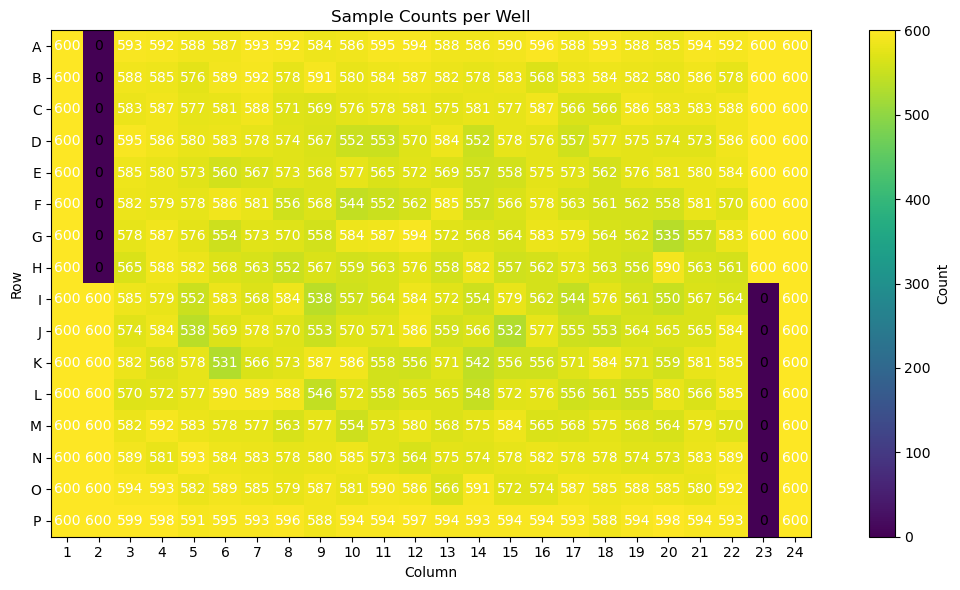

In [221]:
plot_sample_counts_per_well(df_Enamine_no_active_pos)


{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


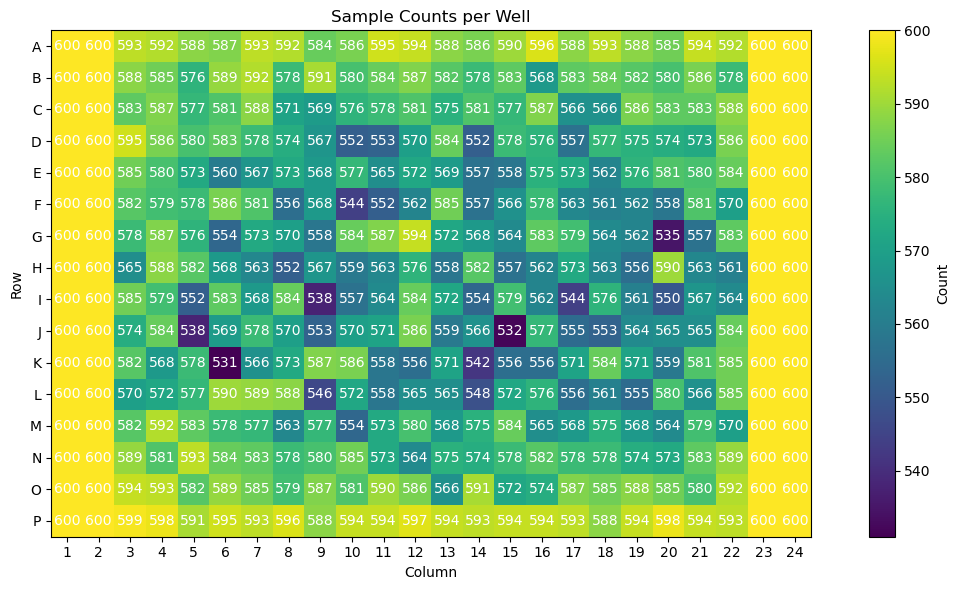

In [222]:
df_Enamine_filled_no_active_pos = augment_specific_columns(df_Enamine_no_active_pos)

plot_sample_counts_per_well(df_Enamine_filled_no_active_pos)


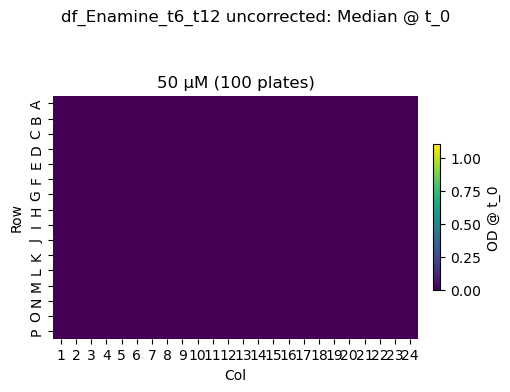

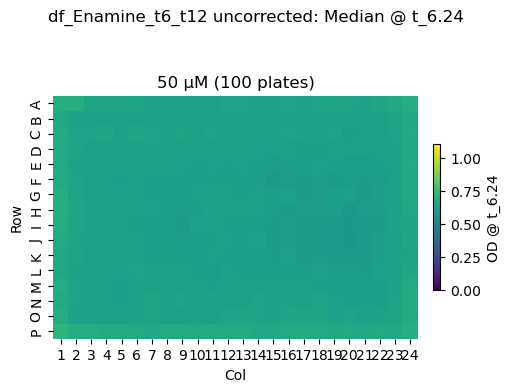

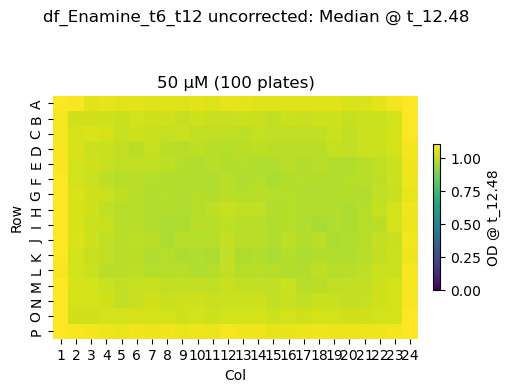

In [223]:

for t in ['t_0','t_6.24','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='uncorrected',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
    )

In [ ]:
'''
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #1 avg Replicates'
concentrations=[50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_1',
        dataset='df_Enamine_t6_t12',
        df_long=,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8)
'''

In [224]:
df_Enamine_well_corrected_1,global_medians,well_medians = correct_well_batch_effect_time(df)
df_Enamine_well_corrected_2,global_medians,well_medians = correct_well_batch_effect_time_conc(df)

In [225]:
df_Enamine_well_corrected_1.equals(df_Enamine_well_corrected_2)


True

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


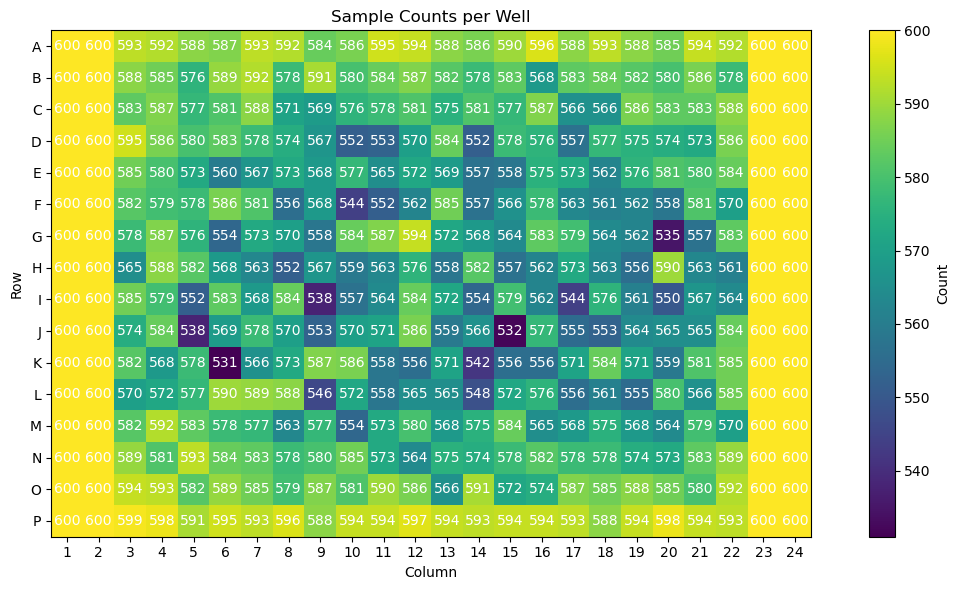

In [226]:
mask_actives_pos_controls = (df_Enamine_well_corrected_1['is_Active'] == 1) | (df_Enamine_well_corrected_1['Control_Label'] == 1)

df_Enamine_corrected_1_no_active_pos = df_Enamine_well_corrected_1.loc[~mask_actives_pos_controls].reset_index(drop=True)

df_Enamine_well_corrected_1_filled_no_active_pos = augment_specific_columns(df_Enamine_corrected_1_no_active_pos)

plot_sample_counts_per_well(df_Enamine_well_corrected_1_filled_no_active_pos)

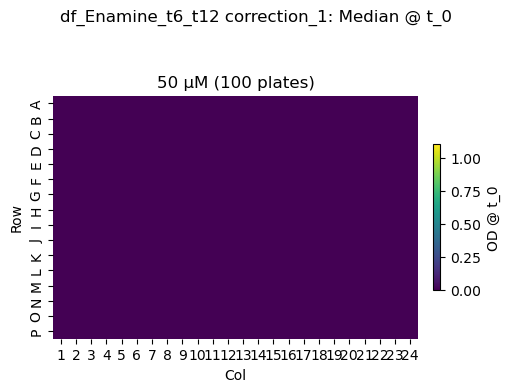

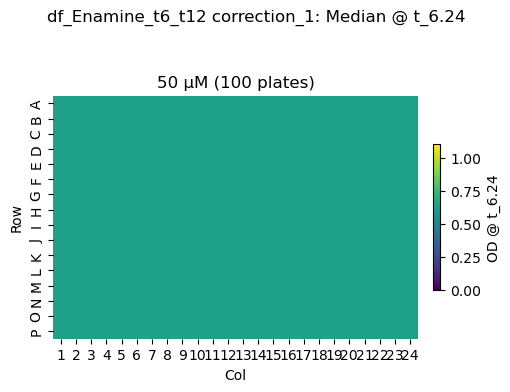

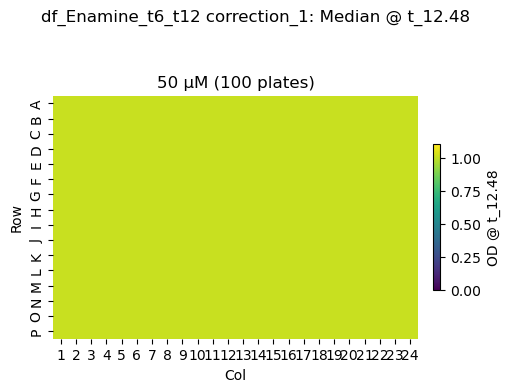

In [227]:

for t in ['t_0','t_6.24','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_1',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_well_corrected_1_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
    )

In [228]:

plate_counts = (
    df_Enamine_well_corrected_1
      .groupby(['Compound', 'Concentration', 'Timepoint'] )['Plate_ID']
      .nunique()           
)
plate_counts_no_ctrl = plate_counts.loc[
    ~plate_counts.index.get_level_values('Compound').isin(['DMSO', 'Ciprofloxacin']  )
]

mixed_plate_groups = plate_counts_no_ctrl[plate_counts_no_ctrl > 1]

if mixed_plate_groups.empty:
    print("✅  All replicates for every compound/time-point are on the same plate.")
else:
    print("⚠️  Some replicate sets span multiple plates:")
    display(mixed_plate_groups)

✅  All replicates for every compound/time-point are on the same plate.


In [244]:
df_Enamine_well_corrected_1_avg = (
    df_Enamine_well_corrected_1
      .drop(columns='Replicate')                      # replicate identifer no longer needed
      .groupby(
          ['Plate_ID', 'Concentration',
           'Compound', 'Control_Label', 'Timepoint'],
          as_index=False
      )
      .agg(
          OD        = ('OD', 'mean'),
          Smiles    = ('Smiles', 'first'),
          is_Active = ('is_Active', 'first'),

      )
)
df_Enamine_well_corrected_1_avg


Plate_ID  Concentration       Compound  Control_Label  \
0      1886318-Y12-A001             50  Ciprofloxacin              1   
1      1886318-Y12-A001             50  Ciprofloxacin              1   
2      1886318-Y12-A001             50  Ciprofloxacin              1   
3      1886318-Y12-A001             50           DMSO             -1   
4      1886318-Y12-A001             50           DMSO             -1   
...                 ...            ...            ...            ...   
96595  1886318-Y12-A100             50     Z963407962              0   
96596  1886318-Y12-A100             50     Z963407962              0   
96597  1886318-Y12-A100             50     Z994483036              0   
96598  1886318-Y12-A100             50     Z994483036              0   
96599  1886318-Y12-A100             50     Z994483036              0   

      Timepoint        OD                                        Smiles  \
0           t_0  0.010702  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
1       t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
2        t_6.24  1.070048  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
3           t_0  0.000000                                          None   
4       t_12.48  0.984288                                          None   
...         ...       ...                                           ...   
96595   t_12.48  0.975825              NCC1CCN(C1)C(=O)C=2C=CC=3OCCC3C2   
96596    t_6.24  0.548262              NCC1CCN(C1)C(=O)C=2C=CC=3OCCC3C2   
96597       t_0  0.000000               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   
96598   t_12.48  1.020788               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   
96599    t_6.24  0.555445               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   

       is_Active  
0              0  
1              1  
2              1  
3              0  
4              0  
...          ...  
96595          1  
96596          0  
96597          0  
96598          0  
96599          0  

[96600 rows x 8 columns]

In [245]:
print(df_Enamine_well_corrected_1_avg['is_Active'].sum())
df_Enamine_well_corrected_1_avg[df_Enamine_well_corrected_1_avg['Compound'] == 'Z27542156']

4134


Plate_ID  Concentration   Compound  Control_Label Timepoint  \
570  1886318-Y12-A001             50  Z27542156              0       t_0   
571  1886318-Y12-A001             50  Z27542156              0   t_12.48   
572  1886318-Y12-A001             50  Z27542156              0    t_6.24   

           OD                                           Smiles  is_Active  
570  0.000000  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          0  
571  0.738166  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          1  
572  0.307276  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          1

Timepoints: ['t_0', 't_6.24', 't_12.48']


ValueError: supplied range of [0.0, inf] is not finite

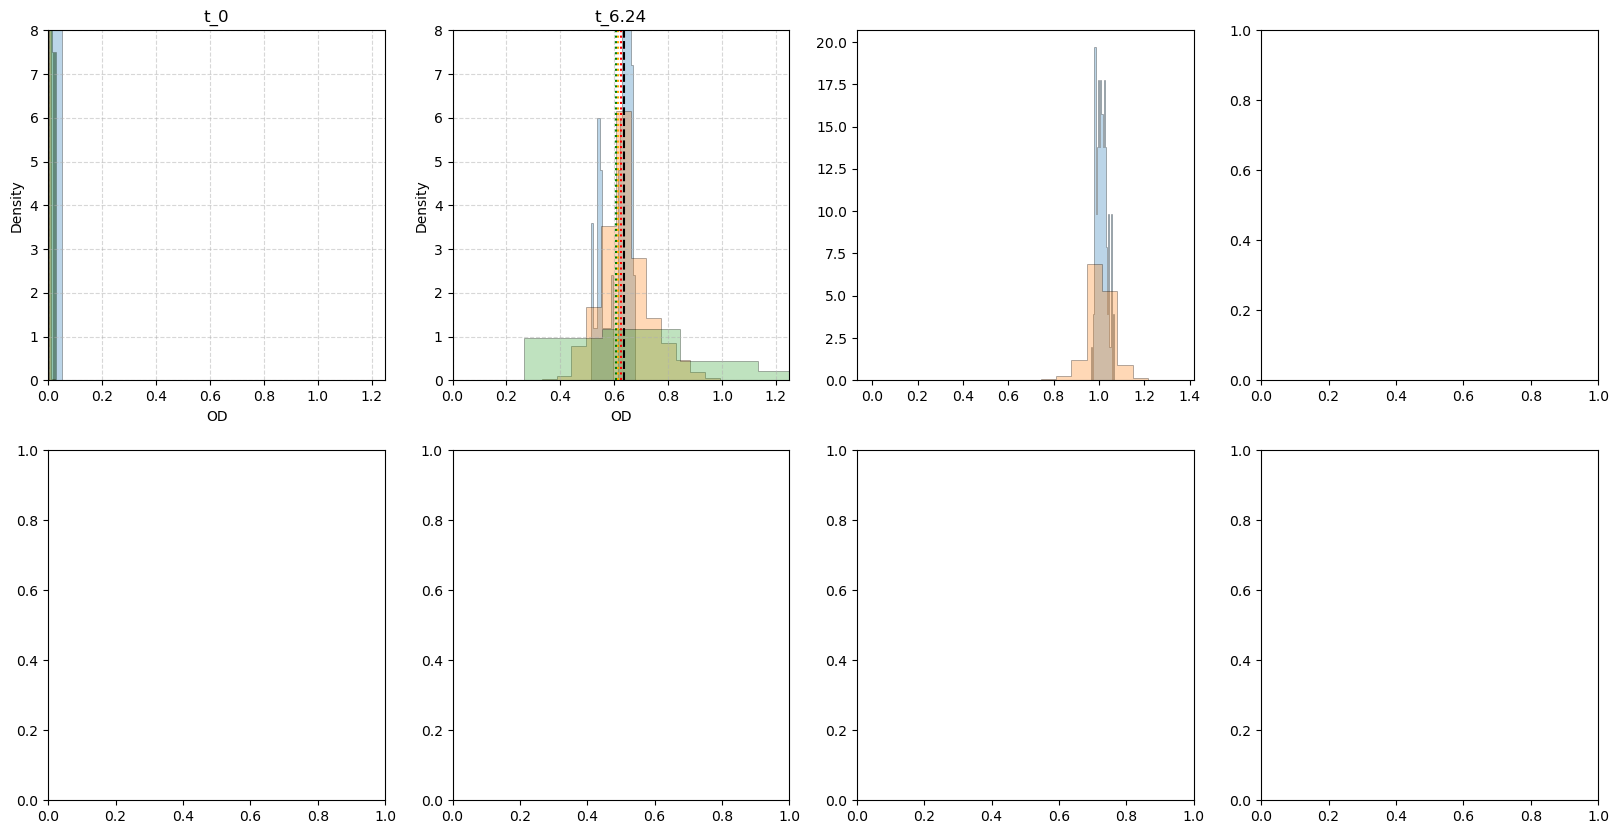

In [246]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #1 avg Replicates'
concentrations=[50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_1',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_well_corrected_1_avg,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8)


In [259]:
bad = df_Enamine_well_corrected_1[df_Enamine_well_corrected_1['OD'].isna()]
print(bad[['Plate_ID', 'Compound', 'Timepoint', 'OD']].head())

                Plate_ID       Compound Timepoint  OD
153601  1886318-Y12-A081  Ciprofloxacin   t_12.48 NaN
153605  1886318-Y12-A081  Ciprofloxacin   t_12.48 NaN
153609  1886318-Y12-A081  Ciprofloxacin   t_12.48 NaN
153617  1886318-Y12-A081  Ciprofloxacin   t_12.48 NaN
153621  1886318-Y12-A081  Ciprofloxacin   t_12.48 NaN


In [251]:
df_Enamine_well_corrected_1_avg[(df_Enamine_well_corrected_1_avg['Timepoint'] == 't_12.48') & (df_Enamine_well_corrected_1_avg['Control_Label'] == 1)]

Plate_ID  Concentration       Compound  Control_Label  \
1      1886318-Y12-A001             50  Ciprofloxacin              1   
967    1886318-Y12-A002             50  Ciprofloxacin              1   
1933   1886318-Y12-A003             50  Ciprofloxacin              1   
2899   1886318-Y12-A004             50  Ciprofloxacin              1   
3865   1886318-Y12-A005             50  Ciprofloxacin              1   
...                 ...            ...            ...            ...   
91771  1886318-Y12-A096             50  Ciprofloxacin              1   
92737  1886318-Y12-A097             50  Ciprofloxacin              1   
93703  1886318-Y12-A098             50  Ciprofloxacin              1   
94669  1886318-Y12-A099             50  Ciprofloxacin              1   
95635  1886318-Y12-A100             50  Ciprofloxacin              1   

      Timepoint        OD                                        Smiles  \
1       t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
967     t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
1933    t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
2899    t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
3865    t_12.48  0.483532  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
...         ...       ...                                           ...   
91771   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
92737   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
93703   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
94669   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
95635   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   

       is_Active  
1              1  
967            1  
1933           1  
2899           1  
3865           1  
...          ...  
91771          1  
92737          1  
93703          1  
94669          1  
95635          1  

[100 rows x 8 columns]

In [252]:
df_Enamine_well_corrected_1_avg[(df_Enamine_well_corrected_1_avg['Timepoint'] == 't_12.48') & (df_Enamine_well_corrected_1_avg['Control_Label'] == 1)]

Plate_ID  Concentration       Compound  Control_Label  \
1      1886318-Y12-A001             50  Ciprofloxacin              1   
967    1886318-Y12-A002             50  Ciprofloxacin              1   
1933   1886318-Y12-A003             50  Ciprofloxacin              1   
2899   1886318-Y12-A004             50  Ciprofloxacin              1   
3865   1886318-Y12-A005             50  Ciprofloxacin              1   
...                 ...            ...            ...            ...   
91771  1886318-Y12-A096             50  Ciprofloxacin              1   
92737  1886318-Y12-A097             50  Ciprofloxacin              1   
93703  1886318-Y12-A098             50  Ciprofloxacin              1   
94669  1886318-Y12-A099             50  Ciprofloxacin              1   
95635  1886318-Y12-A100             50  Ciprofloxacin              1   

      Timepoint        OD                                        Smiles  \
1       t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
967     t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
1933    t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
2899    t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
3865    t_12.48  0.483532  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
...         ...       ...                                           ...   
91771   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
92737   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
93703   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
94669   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
95635   t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   

       is_Active  
1              1  
967            1  
1933           1  
2899           1  
3865           1  
...          ...  
91771          1  
92737          1  
93703          1  
94669          1  
95635          1  

[100 rows x 8 columns]

In [258]:
df[(df['Control_Label'] == 1) & (df['Timepoint'] == 't_12.48')]['OD']

153601    0.000000
153605    0.000000
153609    0.000000
153613    0.000000
153617    0.000000
            ...   
166382    0.000000
166386    0.000000
166390    0.000000
166394    0.002615
166398    0.002615
Name: OD, Length: 3200, dtype: float64